In [75]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import datetime
import os
import csv
import seawater.eos80 as sw
import scipy.io

from matplotlib import cm
from numpy import linspace

import pandas as pd


import cartopy


mpl.style.use('seaborn-muted')
mpl.rc('font', family ='Segoe UI Symbol')

C:\Users\sienn\AppData\Local\Temp\ipykernel_13504\3719038308.py:19: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  mpl.style.use('seaborn-muted')


In [76]:
import pandas as pd

# Read the CSV file into a pandas dataframe
data = pd.read_csv('CTD_lat_lon.csv')

# Print the first few rows to verify the data was imported correctly
print(data.head())

  Names        Lat        Lon
0   a02 -64.258252  62.915507
1   a03 -65.633095  64.167548
2   a04 -65.349153  64.796668
3   a05 -65.229862  65.342640
4   a06 -65.152733  65.348520


<Figure size 640x480 with 0 Axes>

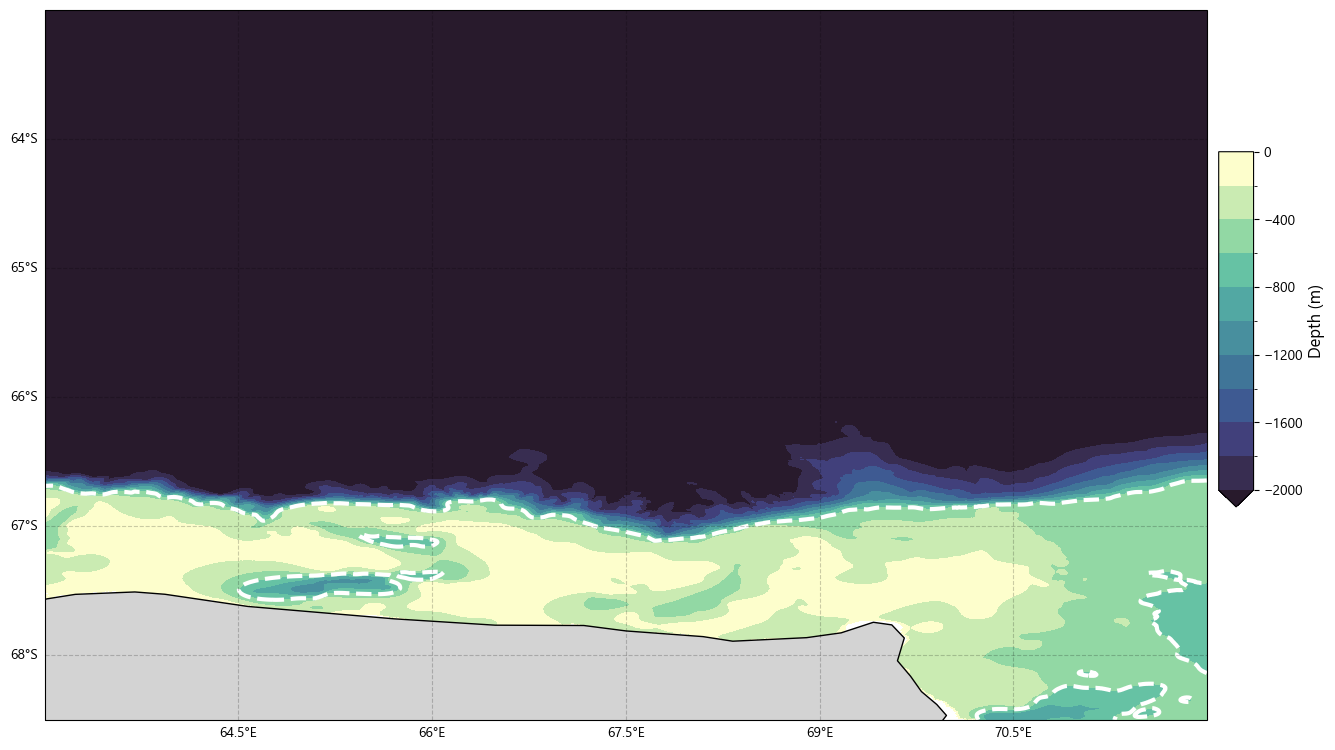

In [77]:
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, zoomed_inset_axes
import cmocean


# Open the NetCDF file with xarray
gebco = xr.open_dataset('bathymetry data/netCDF_CD_bathymetry/GEBCO_30_Apr_2023_950e3c1fe0d8/gebco_2022_n-63.0_s-68.5_w62.5_e72.0.nc', engine='netcdf4')



# Create a plot of the bathymetry data using Cartopy
gs = gridspec.GridSpec(nrows=1,ncols=1,wspace=0.05, hspace=0.05)
plt.cla()
plt.clf()
fig = plt.figure(figsize=[15,10])
ax = None

#make an axis and decorate the cartopy stuff
ax = fig.add_subplot(gs[0,0], projection=ccrs.PlateCarree())
gl = ax.gridlines(draw_labels=True,color='black', alpha=0.2, linestyle='--')
gl.right_labels = False
gl.top_labels = False
Coast = cfeature.NaturalEarthFeature(category='physical',scale='50m',facecolor='none',name='coastline')
feature = ax.add_feature(Coast,edgecolor='black',facecolor='lightgray') # need to find a better land mask than this.
ax.set_extent([63, 72, -68.5, -63])
ax.set_xlabel('Longitude', fontsize=14)
ax.set_ylabel('Latitude', fontsize=14)

# Use the custom colormap with light gray color for values >= 0
elevation = gebco.elevation.where(gebco.elevation < 0, np.nan)

#add data
im = elevation.plot.contourf(x='lon',y='lat',cmap='cmo.deep_r',levels=np.array([*np.arange(-2000,200,200)]),add_colorbar=False)

# Add a contour line for the 500m isobath
contour_lines = ax.contour(gebco.lon, gebco.lat, gebco.elevation, levels=[-600], colors='white', linewidths=3)

#add colourbar
cax = inset_axes(ax,
                width="3%",  # width = 10% of parent_bbox width
                height="50%",  # height : 50%
                loc='right',
                bbox_to_anchor=(.04,.05, 1, 1),
                bbox_transform=ax.transAxes,
                borderpad=0,
                )
cbar = fig.colorbar(im, cax=cax) 
cbar.set_label('Depth (m)', fontsize=12)
ax = plt.gca()

plt.show()
print(contour_lines)

[[ 71.99791667 -66.64486111]
 [ 71.99375    -66.64513889]
 [ 71.98958333 -66.64541667]
 ...
 [ 63.01041667 -66.68702485]
 [ 63.00625    -66.68728448]
 [ 63.00208333 -66.68753531]]


<Figure size 640x480 with 0 Axes>

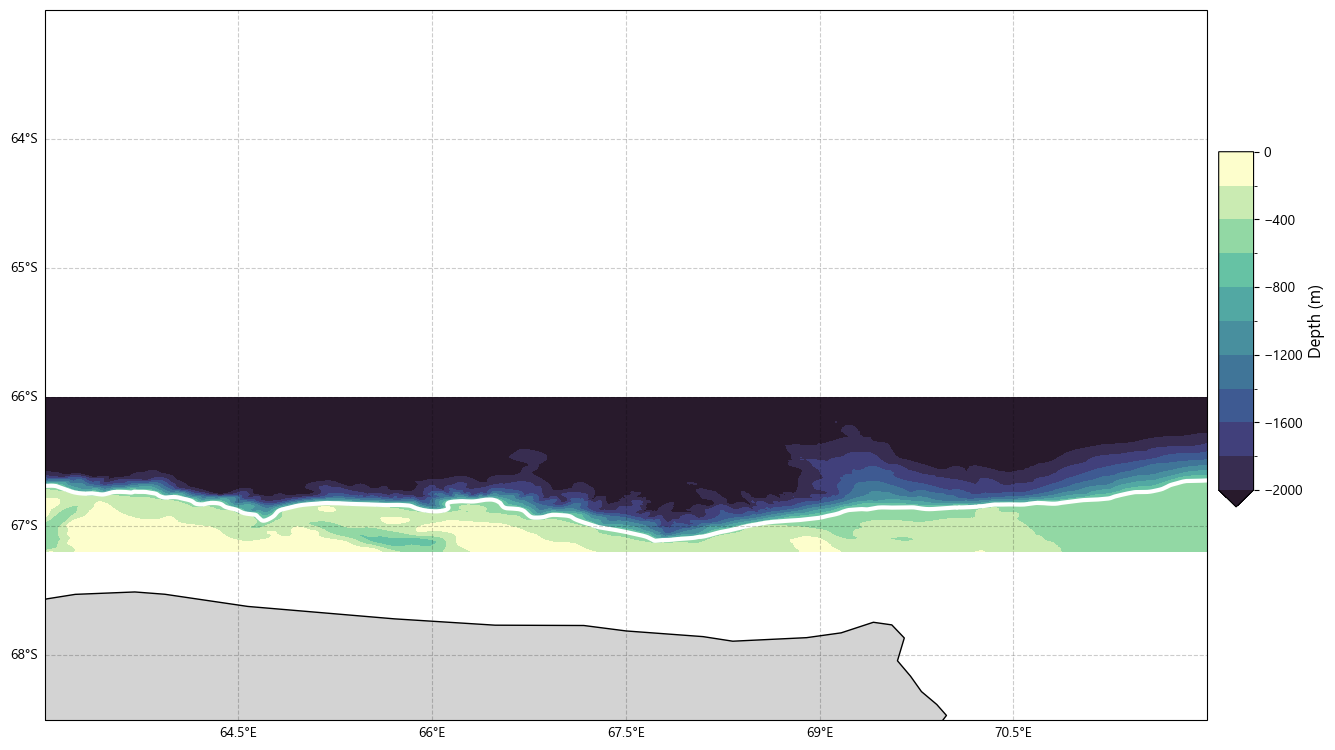

In [80]:
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, zoomed_inset_axes
import cmocean
import numpy as np
import matplotlib.pyplot as plt

# Open the NetCDF file with xarray
gebco_full = xr.open_dataset('bathymetry data/netCDF_CD_bathymetry/GEBCO_30_Apr_2023_950e3c1fe0d8/gebco_2022_n-63.0_s-68.5_w62.5_e72.0.nc', engine='netcdf4')

# Define the latitude and longitude extent of your figure
lon_min, lon_max, lat_min, lat_max = 63, 72, -67.2, -66

# Crop the GEBCO data to match the extent
gebco = gebco_full.sel(lon=slice(lon_min, lon_max), lat=slice(lat_min, lat_max))

# Create a plot of the bathymetry data using Cartopy
gs = gridspec.GridSpec(nrows=1, ncols=1, wspace=0.05, hspace=0.05)
plt.cla()
plt.clf()
fig = plt.figure(figsize=[15, 10])
ax = None

# Make an axis and decorate the cartopy stuff
ax = fig.add_subplot(gs[0, 0], projection=ccrs.PlateCarree())
gl = ax.gridlines(draw_labels=True, color='black', alpha=0.2, linestyle='--')
gl.right_labels = False
gl.top_labels = False
Coast = cfeature.NaturalEarthFeature(category='physical', scale='50m', facecolor='none', name='coastline')
feature = ax.add_feature(Coast, edgecolor='black', facecolor='lightgray')
ax.set_extent([63, 72, -68.5, -63])
#ax.set_extent([63, 72, -67.2, -66])
ax.set_xlabel('Longitude', fontsize=14)
ax.set_ylabel('Latitude', fontsize=14)

# Use the custom colormap with light gray color for values >= 0
elevation = gebco.elevation.where(gebco.elevation < 0, np.nan)

# Add data
im = elevation.plot.contourf(x='lon', y='lat', cmap='cmo.deep_r', levels=np.array([*np.arange(-2000, 200, 200)]), add_colorbar=False)


# Specify the desired contour level for the 600m isobath
desired_contour_level = -600

# Define the region where you want to contour (e.g., a bounding box)
# Change these coordinates to match the specific region of interest
lon_min = 63
lon_max = 72
lat_min = -67.2
lat_max = -66

# Extract contour segments within the specified region
contour_line = ax.contour(gebco.lon, gebco.lat, gebco.elevation, levels=[desired_contour_level], colors='white', linewidths=3, extent=(lon_min, lon_max, lat_min, lat_max))


# Initialize variables to store the longest contour line
max_length = 0
desired_contour_line = None

# Iterate through the contour lines to find the longest one
for contour_path in contour_line.collections:  # Use contour_line directly
    # Extract the vertices of the contour line
    vertices = contour_path.get_paths()[0].vertices  # Use contour_path directly
    
    # Calculate the length of the contour line
    path_length = np.sum(np.sqrt(np.diff(vertices[:, 0])**2 + np.diff(vertices[:, 1])**2))
    
    if path_length > max_length:
        max_length = path_length
        desired_contour_line = contour_path  # Store the contour_path, not contour_line

# Check if a contour line was found
if desired_contour_line is not None:
    # Extract the coordinates of the desired contour line
    contour_line_coordinates = desired_contour_line.get_paths()[0].vertices
    
    # Remove the original contours
    for contour_path in contour_line.collections:  # Use contour_line directly
        contour_path.remove()
    
    # Plot the desired contour line
    ax.plot(contour_line_coordinates[:, 0], contour_line_coordinates[:, 1], color='white', linewidth=3)
else:
    # Handle the case where no desired contour line was found
    print("No desired contour line found.")


print(contour_line_coordinates)
# Add colorbar
cax = inset_axes(ax, width="3%", height="50%", loc='right', bbox_to_anchor=(.04, .05, 1, 1), bbox_transform=ax.transAxes, borderpad=0)
cbar = fig.colorbar(im, cax=cax)
cbar.set_label('Depth (m)', fontsize=12)

ax = plt.gca()
plt.show()


<Figure size 640x480 with 0 Axes>

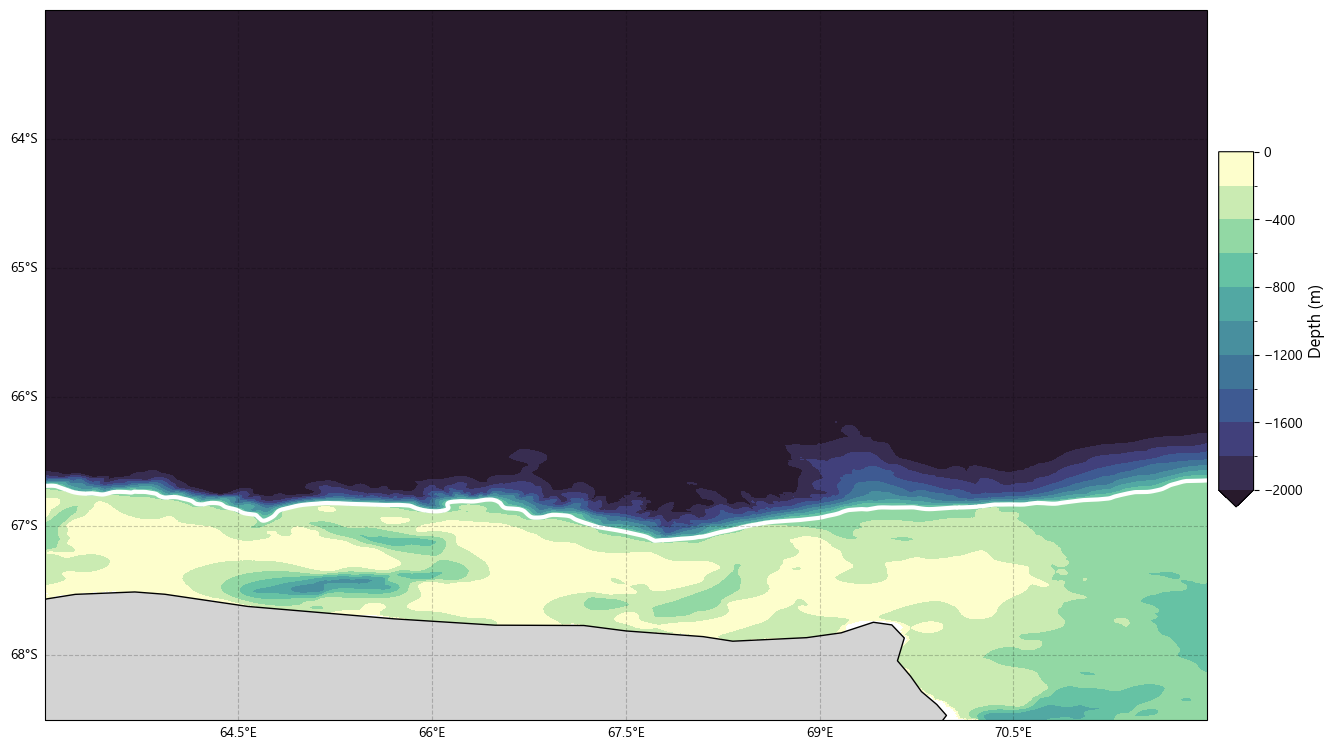

In [81]:
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, zoomed_inset_axes
import cmocean


# Open the NetCDF file with xarray
gebco = xr.open_dataset('bathymetry data/netCDF_CD_bathymetry/GEBCO_30_Apr_2023_950e3c1fe0d8/gebco_2022_n-63.0_s-68.5_w62.5_e72.0.nc', engine='netcdf4')



# Create a plot of the bathymetry data using Cartopy
gs = gridspec.GridSpec(nrows=1,ncols=1,wspace=0.05, hspace=0.05)
plt.cla()
plt.clf()
fig = plt.figure(figsize=[15,10])
ax = None

#make an axis and decorate the cartopy stuff
ax = fig.add_subplot(gs[0,0], projection=ccrs.PlateCarree())
gl = ax.gridlines(draw_labels=True,color='black', alpha=0.2, linestyle='--')
gl.right_labels = False
gl.top_labels = False
Coast = cfeature.NaturalEarthFeature(category='physical',scale='50m',facecolor='none',name='coastline')
feature = ax.add_feature(Coast,edgecolor='black',facecolor='lightgray') # need to find a better land mask than this.
ax.set_extent([63, 72, -68.5, -63])
ax.set_xlabel('Longitude', fontsize=14)
ax.set_ylabel('Latitude', fontsize=14)

# Use the custom colormap with light gray color for values >= 0
elevation = gebco.elevation.where(gebco.elevation < 0, np.nan)

#add data
im = elevation.plot.contourf(x='lon',y='lat',cmap='cmo.deep_r',levels=np.array([*np.arange(-2000,200,200)]),add_colorbar=False)

# Add a contour line for the 500m isobath
#contour_lines = ax.contour(gebco.lon, gebco.lat, gebco.elevation, levels=[-600], colors='white', linewidths=3)

ax.plot(contour_line_coordinates[:, 0], contour_line_coordinates[:, 1], color='white', linewidth=3)

#add colourbar
cax = inset_axes(ax,
                width="3%",  # width = 10% of parent_bbox width
                height="50%",  # height : 50%
                loc='right',
                bbox_to_anchor=(.04,.05, 1, 1),
                bbox_transform=ax.transAxes,
                borderpad=0,
                )
cbar = fig.colorbar(im, cax=cax) 
cbar.set_label('Depth (m)', fontsize=12)
ax = plt.gca()

plt.show()

<Figure size 640x480 with 0 Axes>

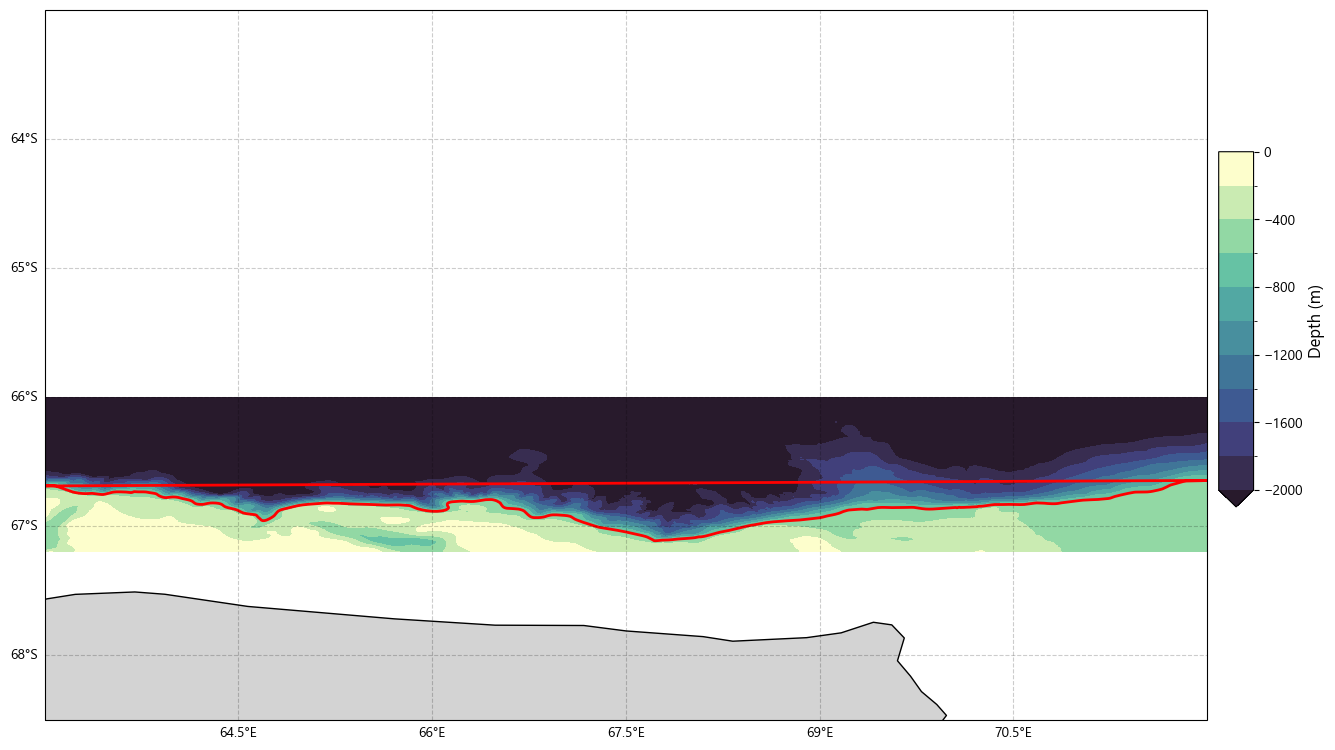

In [67]:
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, zoomed_inset_axes
import cmocean
import numpy as np
import matplotlib.pyplot as plt

# Open the NetCDF file with xarray
gebco_full = xr.open_dataset('bathymetry data/netCDF_CD_bathymetry/GEBCO_30_Apr_2023_950e3c1fe0d8/gebco_2022_n-63.0_s-68.5_w62.5_e72.0.nc', engine='netcdf4')

# Define the latitude and longitude extent of your figure
lon_min, lon_max, lat_min, lat_max = 63, 72, -67.2, -66

# Crop the GEBCO data to match the extent
gebco = gebco.sel(lon=slice(lon_min, lon_max), lat=slice(lat_min, lat_max))

# Create a plot of the bathymetry data using Cartopy
gs = gridspec.GridSpec(nrows=1, ncols=1, wspace=0.05, hspace=0.05)
plt.cla()
plt.clf()
fig = plt.figure(figsize=[15, 10])
ax = None

# Make an axis and decorate the cartopy stuff
ax = fig.add_subplot(gs[0, 0], projection=ccrs.PlateCarree())
gl = ax.gridlines(draw_labels=True, color='black', alpha=0.2, linestyle='--')
gl.right_labels = False
gl.top_labels = False
Coast = cfeature.NaturalEarthFeature(category='physical', scale='50m', facecolor='none', name='coastline')
feature = ax.add_feature(Coast, edgecolor='black', facecolor='lightgray')
ax.set_extent([63, 72, -68.5, -63])
#ax.set_extent([63, 72, -67.2, -66])
ax.set_xlabel('Longitude', fontsize=14)
ax.set_ylabel('Latitude', fontsize=14)

# Use the custom colormap with light gray color for values >= 0
elevation = gebco.elevation.where(gebco.elevation < 0, np.nan)

# Add data
im = elevation.plot.contourf(x='lon', y='lat', cmap='cmo.deep_r', levels=np.array([*np.arange(-2000, 200, 200)]), add_colorbar=False)


# Specify the desired contour level for the 600m isobath
desired_contour_level = -600

# Define the region where you want to contour (e.g., a bounding box)
# Change these coordinates to match the specific region of interest
lon_min = 63
lon_max = 72
lat_min = -67.2
lat_max = -66

# Extract contour segments within the specified region
contour_line = ax.contour(gebco.lon, gebco.lat, gebco.elevation, levels=[desired_contour_level], colors='white', linewidths=3, extent=(lon_min, lon_max, lat_min, lat_max))




from shapely.geometry import Polygon



# Initialize variables to store the longest contour line
max_length = 0
desired_contour_line = None

# Iterate through the contour lines to find the longest one
for contour_path in contour_line.collections:  # Use contour_line directly
    # Extract the vertices of the contour line
    vertices = contour_path.get_paths()[0].vertices  # Use contour_path directly
    
    # Calculate the length of the contour line
    path_length = np.sum(np.sqrt(np.diff(vertices[:, 0])**2 + np.diff(vertices[:, 1])**2))
    
    if path_length > max_length:
        max_length = path_length
        desired_contour_line = vertices  # Store the vertices of the contour


# Check if a contour line was found
if desired_contour_line is not None:
    # Create a polygon from the contour line
    contour_polygon = Polygon(desired_contour_line)

    # Remove the original contours
    for contour_path in contour_line.collections:  # Use contour_line directly
        contour_path.remove()

else:
    # Handle the case where no desired contour line was found
    print("No desired contour line found.")


# Extract the coordinates of the contour polygon
contour_x, contour_y = contour_polygon.exterior.xy

# Plot the contour polygon
ax.plot(contour_x, contour_y, color='red', linewidth=2)


# Add colorbar
cax = inset_axes(ax, width="3%", height="50%", loc='right', bbox_to_anchor=(.04, .05, 1, 1), bbox_transform=ax.transAxes, borderpad=0)
cbar = fig.colorbar(im, cax=cax)
cbar.set_label('Depth (m)', fontsize=12)

ax = plt.gca()
plt.show()


In [ ]:
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, zoomed_inset_axes
import cmocean


# Open the NetCDF file with xarray
gebco = xr.open_dataset('bathymetry data/netCDF_CD_bathymetry/GEBCO_30_Apr_2023_950e3c1fe0d8/gebco_2022_n-63.0_s-68.5_w62.5_e72.0.nc', engine='netcdf4')



# Create a plot of the bathymetry data using Cartopy
gs = gridspec.GridSpec(nrows=1,ncols=1,wspace=0.05, hspace=0.05)
plt.cla()
plt.clf()
fig = plt.figure(figsize=[15,10])
ax = None

#make an axis and decorate the cartopy stuff
ax = fig.add_subplot(gs[0,0], projection=ccrs.PlateCarree())
gl = ax.gridlines(draw_labels=True,color='black', alpha=0.2, linestyle='--')
gl.right_labels = False
gl.top_labels = False
Coast = cfeature.NaturalEarthFeature(category='physical',scale='50m',facecolor='none',name='coastline')
feature = ax.add_feature(Coast,edgecolor='black',facecolor='lightgray') # need to find a better land mask than this.
ax.set_extent([63, 72, -68.5, -63])
ax.set_xlabel('Longitude', fontsize=14)
ax.set_ylabel('Latitude', fontsize=14)

# Use the custom colormap with light gray color for values >= 0
elevation = gebco.elevation.where(gebco.elevation < 0, np.nan)

#add data
im = elevation.plot.contourf(x='lon',y='lat',cmap='cmo.deep_r',levels=np.array([*np.arange(-2000,250,250)]),add_colorbar=False)


#add colourbar
cax = inset_axes(ax,
                width="3%",  # width = 10% of parent_bbox width
                height="50%",  # height : 50%
                loc='right',
                bbox_to_anchor=(.04,.05, 1, 1),
                bbox_transform=ax.transAxes,
                borderpad=0,
                )
cbar = fig.colorbar(im, cax=cax) 
cbar.set_label('Depth (m)', fontsize=12)
ax = plt.gca()


plt.show()

C:\Users\sienn\AppData\Local\Temp\ipykernel_25452\3187471628.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('cmo.topo')


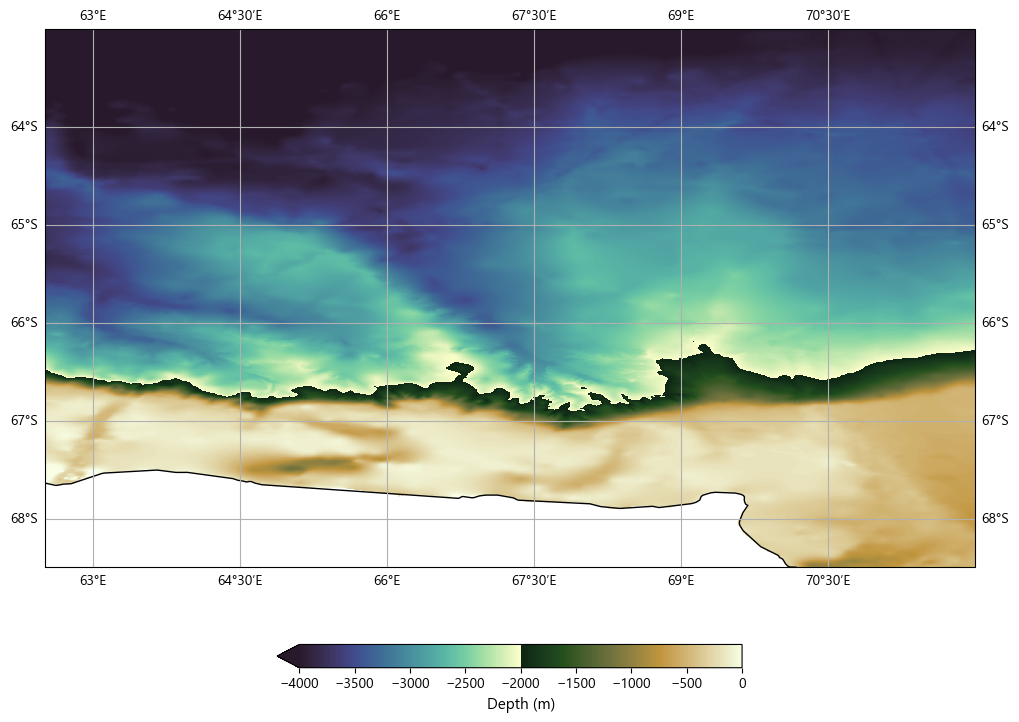

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import cmocean

# Define a custom colormap with light gray color for values >= 0
#cmap = plt.cm.get_cmap('cmo.delta_r')
cmap = plt.cm.get_cmap('cmo.topo')
cmap.set_over('gray')

# Open the NetCDF file with xarray
gebco = xr.open_dataset('bathymetry data/netCDF_CD_bathymetry/GEBCO_30_Apr_2023_950e3c1fe0d8/gebco_2022_n-63.0_s-68.5_w62.5_e72.0.nc', engine='netcdf4')

# Set the figure size
plt.figure(figsize=(12, 10))

# Create a plot of the bathymetry data using Cartopy
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.set_extent([gebco.lon.min(), gebco.lon.max(), gebco.lat.min(), gebco.lat.max()])
Coast = cfeature.NaturalEarthFeature(category='physical',scale='50m',facecolor='none',name='coastline')

# Use the custom colormap with light gray color for values >= 0
elevation = gebco.elevation.where(gebco.elevation < 0, np.nan)
im = elevation.plot.pcolormesh('lon', 'lat', ax=ax, cmap=cmap, vmin=-4000, vmax=0, add_colorbar=False)

# Add colorbar
cbar = plt.colorbar(im, ax=ax, orientation='horizontal', shrink=0.5, pad=0.1, extend='min')
cbar.set_label('Depth (m)', fontsize=11)

ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)

plt.show()


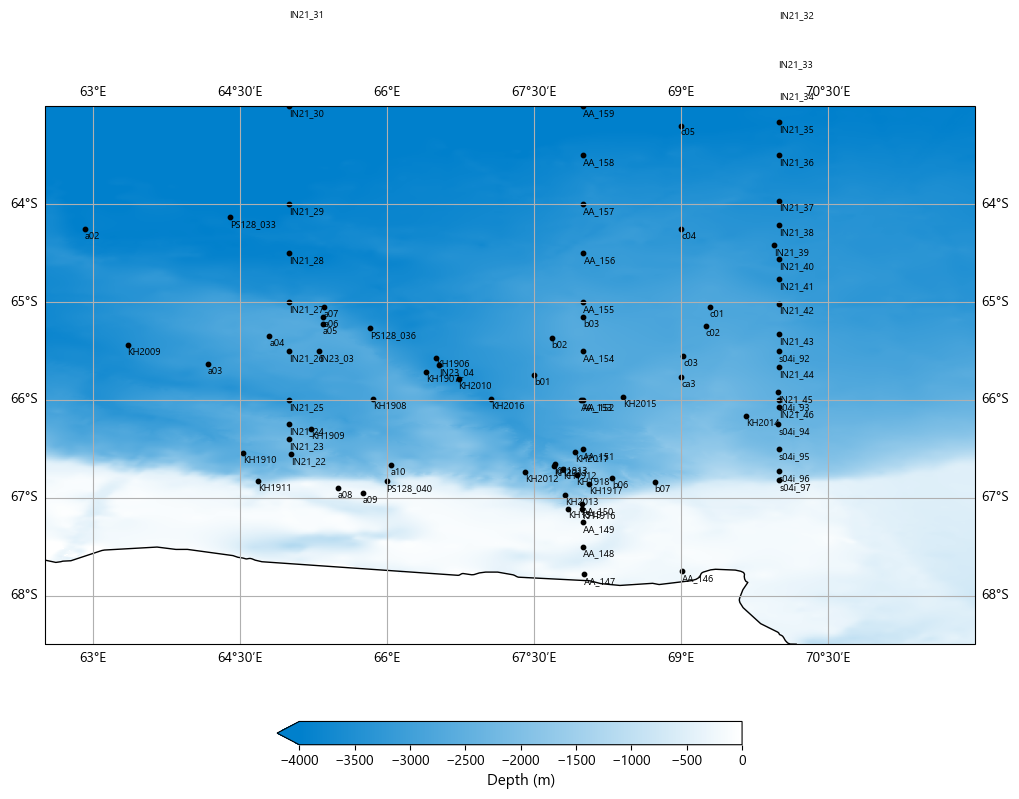

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap


#### plotting the GEBCO bathymetry data and general map features ####

# Define a custom colormap with light gray color for values >= 0
#cmap = plt.cm.get_cmap('cmo.delta_r')
#cmap = plt.cm.get_cmap('cmo.topo')
#cmap = plt.cm.get_cmap('Blues_r')

#### custom colour map
vmin, vmax = -4000, 0
cmap_colors = [(0, 0.5, 0.8), (1, 1, 1)]
cmap_name = 'custom_blue'
cmap = LinearSegmentedColormap.from_list(cmap_name, cmap_colors)
cmap.set_over('gray')

# Open the NetCDF file with xarray
gebco = xr.open_dataset('bathymetry data/netCDF_CD_bathymetry/GEBCO_30_Apr_2023_950e3c1fe0d8/gebco_2022_n-63.0_s-68.5_w62.5_e72.0.nc', engine='netcdf4')

# Set the figure size
plt.figure(figsize=(12, 10))

# Create a plot of the bathymetry data using Cartopy
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.set_extent([gebco.lon.min(), gebco.lon.max(), gebco.lat.min(), gebco.lat.max()])
Coast = cfeature.NaturalEarthFeature(category='phyiscal',scale='50m',facecolor='none',name='coastline')

# Use the custom colormap with light gray color for values >= 0
elevation = gebco.elevation.where(gebco.elevation < 0, np.nan)
im = elevation.plot.pcolormesh('lon', 'lat', ax=ax, cmap=cmap, vmin=-4000, vmax=0, add_colorbar=False)

# Add colorbar
cbar = plt.colorbar(im, ax=ax, orientation='horizontal', shrink=0.5, pad=0.1, extend='min')
cbar.set_label('Depth (m)', fontsize=11)

ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)






##### plotting the CTD data on map #####

# Plot the latitude and longitude points on the map
ax.scatter(data['Lon'], data['Lat'], transform=ccrs.PlateCarree(), s=10, color='black')

# Add the cast name as text to the plot
for i, txt in enumerate(data['Names']):
    ax.text(data['Lon'][i], data['Lat'][i]-0.1, txt, transform=ccrs.PlateCarree(), fontsize=7)


plt.show()

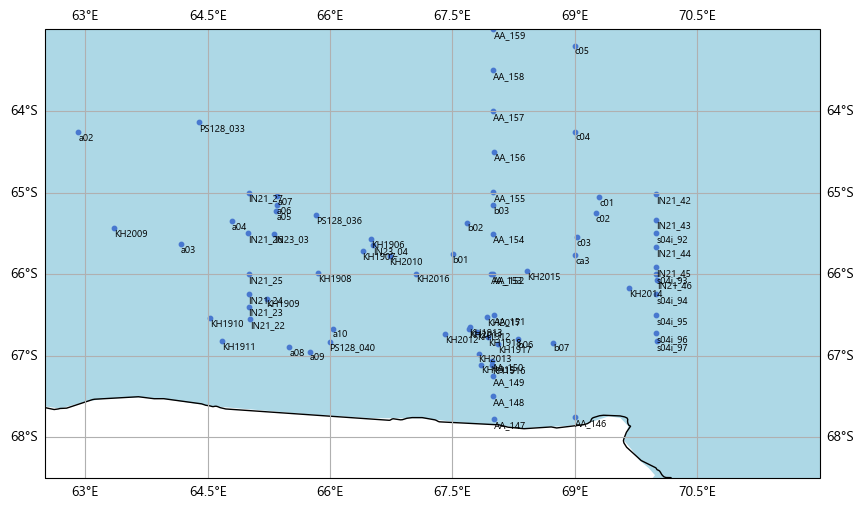

In [29]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature


# Create a plot with the desired projection
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

# Set the longitude and latitude extent of the map
ax.set_extent([62.5, 72, -68.5, -63])

# Set the color of the basemap
ax.add_feature(cfeature.OCEAN.with_scale('50m'), facecolor='lightblue')

# Plot the latitude and longitude points on the map
ax.scatter(data['Lon'], data['Lat'], transform=ccrs.PlateCarree(), s=10)

# Add the cast name as text to the plot
for i, txt in enumerate(data['Names']):
    ax.text(data['Lon'][i], data['Lat'][i]-0.1, txt, transform=ccrs.PlateCarree(), fontsize=7)

# Add other plot elements, such as coastlines and gridlines
ax.coastlines(resolution='10m')
ax.gridlines(draw_labels=True)


# Show the plot
plt.show()

In [7]:
###only run these if need to update seal data to right format

######### remove rows with no temp or salt data from seal data files to make them smaller

import pandas as pd
import os

# set the path to the folder containing the CSV files
folder_path = "Seal data"

# locate the new folder for the cleaned CSV files
new_folder_name = "Seal data dropped nan"

# get the path of the subfolder
new_folder_path = os.path.join(folder_path, new_folder_name)

# check if the subfolder already exists
if not os.path.exists(new_folder_path):
    # create the subfolder if it does not exist
    os.makedirs(new_folder_path)

# loop through all the CSV files in the folder
for file_name in os.listdir(folder_path):
    if file_name.endswith(".csv"):
        # read the CSV file into a pandas DataFrame
        file_path = os.path.join(folder_path, file_name)
        df = pd.read_csv(file_path)
        
        # drop rows with NaN values
        df.dropna(inplace=True)
        
        # save the cleaned DataFrame back to a new CSV file
        new_file_path = os.path.join(new_folder_path, f"{os.path.splitext(file_name)[0]}_droppednan.csv")
        df.to_csv(new_file_path, index=False)

In [113]:
######### add oxygen column with NaN values to seal data in same spot as CTD data  

import pandas as pd
import os

# directory where the csv files are stored
path = r"Seal data/Seal data dropped nan"

# locate the new folder for the cleaned CSV files
new_folder_name = "Seal data with oxygen"

# get the path of the subfolder
new_folder_path = os.path.join(path, new_folder_name)

# check if the subfolder already exists
if not os.path.exists(new_folder_path):
    # create the subfolder if it does not exist
    os.makedirs(new_folder_path)

# Loop through all the CSV files in the folder
for filename in os.listdir(path):
    if filename.endswith(".csv"):
        # Read in the CSV file
        df = pd.read_csv(os.path.join(path, filename))
        
        # Insert a new column for oxygen filled with NaN values
        df.insert(3, "oxygen", "NaN")
        
        # Define the new filename with "_updated" appended to the original filename
        new_filename = filename.split('.')[0] + '_oxygen.csv'
        
        # Write the updated DataFrame to a new CSV file with the new filename
        df.to_csv(os.path.join(new_folder_path, new_filename), index=False)

In [ ]:
##### then need to take these edited files, go to MATLAB and run the convert_salt_temp_depth_dens.m file on them to calculate abs salt, cons temp, depth, neu dens
##### then come back and run the code below 

In [116]:
##### the code must all be in this order or it throws a fit 
#pressure | temperature | salinity | oxygen | latitude | longitude | neutral density | absolute salinity | conservative temperature | depth | time | type
## so once calculated other variables in matlab, come back here and rearrange the seal data 

import os
import pandas as pd

# Specify the folder path
folder_path = 'Seal data/Seal data dropped nan/Seal data with oxygen/Seal data with all variables'

# locate the new folder for the cleaned CSV files
new_folder_name = "Seal data final"

# get the path of the subfolder
new_folder_path = os.path.join(folder_path, new_folder_name)

# check if the subfolder already exists
if not os.path.exists(new_folder_path):
    # create the subfolder if it does not exist
    os.makedirs(new_folder_path)



# loop through all the CSV files in the folder
for file_name in os.listdir(folder_path):
    if file_name.endswith(".csv"):
        # read the CSV file into a pandas DataFrame
        file_path = os.path.join(folder_path, file_name)
        df = pd.read_csv(file_path, keep_default_na=False)
        
        # Reorder the columns
        df = df[['pressure', 'temperature', 'salinity', 'oxygen', 'latitude', 'longitude', 'neutral density', 'absolute salinity', 'conservative temperature', 'depth', 'time']]

        # Define the new filename with "_updated" appended to the original filename
        new_filename = file_name.split('.')[0] + '_ordered.csv'
        
        # Write the updated DataFrame to a new CSV file with the new filename
        df.to_csv(os.path.join(new_folder_path, new_filename), index=False)




################# ok now the data should be in order, that was a lot 
################# copy paste all this updated seal data into the "Seal and CTD" folder and then run the cells below

In [6]:
############### start running code form here if got all csv files ready ##########################

################################ csv files #############################################  

import glob

headers = []
csv_cast_lat_lon = {}
csv_ctd_data_dict = {}

# directory where the csv files are stored
csv_dir = r"Seal and CTD type"

#can choose what files to exclude. s04i_97 has an error with oxygen readings below a certain depth, so can remove it this way
#exclude_file = "s04i_97_updated.csv"

for filename in glob.glob(os.path.join(csv_dir, "*.csv")):
    #can comment this line out if want all the files
    #if os.path.basename(filename) != exclude_file:
        # read the csv file
        first = True
        try:
            csv_filehandle = open(filename) 
            #print(filename)
            csvfile = csv.reader(csv_filehandle)
        except:
            #print("load fail")        
            continue  

        # get the file name without the directory path and file extension
        fn = os.path.splitext(os.path.basename(filename))[0]

        # inistialise the data structure 
        csv_ctd_data_dict[fn] = {}
        for row in csvfile:        
            if first:
                header = row

                first = False
                for i in range(len(row)):                                                
                    headers.append(row[i])
                    csv_ctd_data_dict[fn][row[i]] = []     
                
                # Check if 'time' column exists in the header
                if 'time' not in headers:
                    print(f"'time' column not found in file: {filename}")
                    break
            else:
                for i in range(len(row)):            
                    csv_ctd_data_dict[fn][headers[i]].append(float(row[i]))

        csv_cast_lat_lon[fn] = {'lat' :np.mean(csv_ctd_data_dict[fn]['latitude']) , 'lon' : np.mean(csv_ctd_data_dict[fn]['longitude']) }

    
# #print(csv_cast_lat_lon)
# for key in csv_ctd_data_dict['cnv_subset_c04_updated'].keys():
#     print(key)

In [82]:
############### start running code form here if got all csv files ready ##########################

################################ csv files #############################################  

import glob

headers = []
csv_cast_lat_lon = {}
csv_ctd_data_dict = {}

# directory where the csv files are stored
csv_dir = r"Seal and CTD type"

# can choose what files to exclude. s04i_97 has an error with oxygen readings below a certain depth, so can remove it this way
# exclude_file = "s04i_97_updated.csv"

for filename in glob.glob(os.path.join(csv_dir, "*.csv")):
    # can comment this line out if want all the files
    # if os.path.basename(filename) != exclude_file:
    # read the csv file
    first = True
    try:
        csv_filehandle = open(filename)
        # print(filename)
        csvfile = csv.reader(csv_filehandle)
    except:
        # print("load fail")
        continue

    # get the file name without the directory path and file extension
    fn = os.path.splitext(os.path.basename(filename))[0]

    # initialize the data structure
    csv_ctd_data_dict[fn] = {}
    
    # Flag variable to check if 'time' column is found
    time_column_found = False
    
    for row in csvfile:
        if first:
            header = row

            first = False
            for i in range(len(row)):
                headers.append(row[i])
                csv_ctd_data_dict[fn][row[i]] = []
                
                # Check if 'time' column exists in the header
                if row[i] == 'time':
                    time_column_found = True

            # If 'time' column is not found, print the error and break
            if not time_column_found:
                print(f"'time' column not found in file: {filename}")
                break

        else:
            for i in range(len(row)):
                csv_ctd_data_dict[fn][headers[i]].append(float(row[i]))

    csv_cast_lat_lon[fn] = {'lat': np.mean(csv_ctd_data_dict[fn]['latitude']), 'lon': np.mean(csv_ctd_data_dict[fn]['longitude'])}


# #print(csv_cast_lat_lon)
# for key in csv_ctd_data_dict['cnv_subset_c04_updated'].keys():
#     print(key)

In [83]:
##run this code to order the dictionary by lat & lon. D
## i origingally did this when I had less casts and had a legend instead of a colour bar, so not really necessary, 
## but i use this dictionary in code later on so it does'nt hurt to do it or you will have to change the dictionary you call in plots below

csv_lon_ordered = sorted(csv_cast_lat_lon, key=lambda x: (csv_cast_lat_lon[x]['lon']))
csv_lat_ordered = sorted(csv_cast_lat_lon, key=lambda x: (csv_cast_lat_lon[x]['lat']))

In [84]:
# Initialize empty lists for each variable
latitude_list = []
longitude_list = []


# Loop over the dictionary and extract the data for each variable
for cast in csv_ctd_data_dict.values():    
    latitude_list.append(cast['latitude'])
    longitude_list.append(cast['longitude'])


#print(latitude_list)


# Convert the lists to NumPy arrays
latitude = np.concatenate(latitude_list)
longitude = np.concatenate(longitude_list)


print(latitude)
print(longitude)
len(longitude)

[-67.75034 -67.75034 -67.75034 ... -65.0305  -65.0305  -65.0305 ]
[69.00584 69.00584 69.00584 ... 71.407   71.407   71.407  ]


246572

<Figure size 640x480 with 0 Axes>

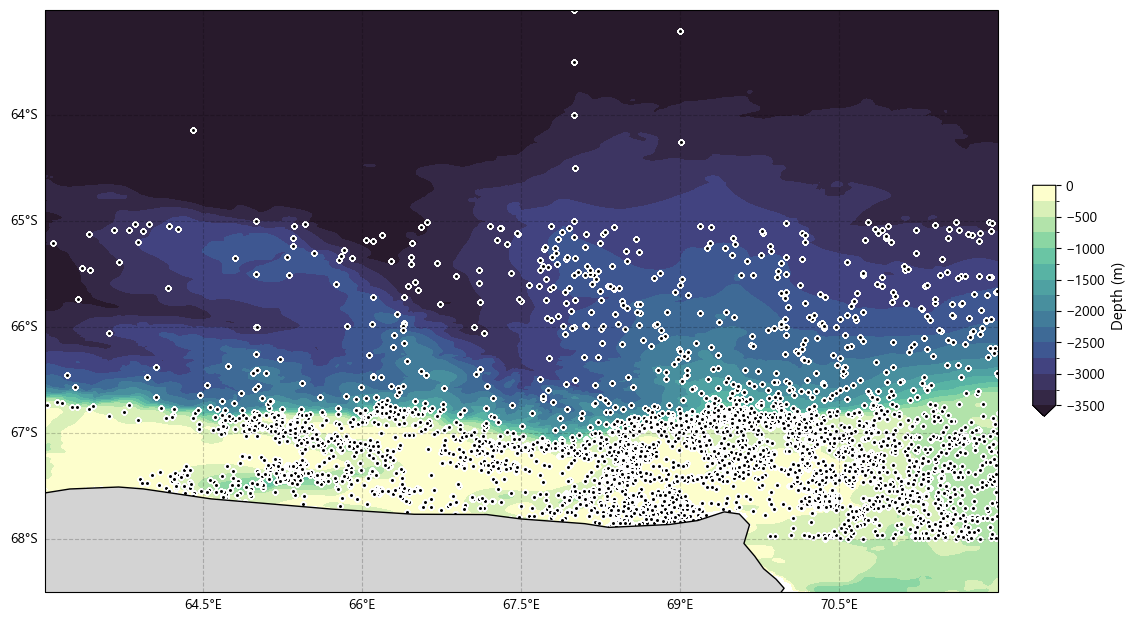

In [10]:
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, zoomed_inset_axes
import cmocean
from cartopy.mpl.geoaxes import GeoAxes

# Open the NetCDF file with xarray
gebco = xr.open_dataset('bathymetry data/netCDF_CD_bathymetry/GEBCO_30_Apr_2023_950e3c1fe0d8/gebco_2022_n-63.0_s-68.5_w62.5_e72.0.nc', engine='netcdf4')



# Create a plot of the bathymetry data using Cartopy
gs = gridspec.GridSpec(nrows=1,ncols=1,wspace=0.05, hspace=0.05)
plt.cla()
plt.clf()
fig = plt.figure(figsize=[15,10])
ax = None

#make an axis and decorate the cartopy stuff
ax = fig.add_subplot(gs[0,0], projection=ccrs.PlateCarree())
#ax = fig.add_subplot(gs[0,0], projection=GeoAxes(projection_class=ccrs.PlateCarree()))
#ax = fig.add_subplot(gs[0,0], map_projection=ccrs.PlateCarree())
gl = ax.gridlines(draw_labels=True,color='black', alpha=0.2, linestyle='--')
gl.right_labels = False
gl.top_labels = False
Coast = cfeature.NaturalEarthFeature(category='physical',scale='50m',facecolor='none',name='coastline')
feature = ax.add_feature(Coast,edgecolor='black',facecolor='lightgray') # need to find a better land mask than this.
ax.set_extent([63, 72, -68.5, -63])
ax.set_xlabel('Longitude', fontsize=14)
ax.set_ylabel('Latitude', fontsize=14)

# Use the custom colormap with light gray color for values >= 0
elevation = gebco.elevation.where(gebco.elevation < 0, np.nan)

#add data
im = elevation.plot.contourf(x='lon',y='lat', ax=ax, cmap='cmo.deep_r',levels=np.array([*np.arange(-3500,250,250)]),add_colorbar=False)





# Add colorbar
cbar = plt.colorbar(im, ax=ax, orientation='vertical', shrink=0.3, pad=0.03, aspect=10, extend='min')
cbar.set_label('Depth (m)', fontsize=11)


# #add colourbar
# cax = inset_axes(ax,
#                 width="3%",  # width = 10% of parent_bbox width
#                 height="50%",  # height : 50%
#                 loc='right',
#                 bbox_to_anchor=(.04,.05, 1, 1),
#                 bbox_transform=ax.transAxes,
#                 borderpad=0,
#                 )
# cbar = fig.colorbar(im, cax=cax) 
# cbar.set_label('Depth (m)', fontsize=12)
# ax = plt.gca()




##### plotting the CTD data on map #####

# Plot the latitude and longitude points on the map
ax.scatter(longitude, latitude, transform=ccrs.PlateCarree(), s=10, facecolor = 'black', edgecolor = 'white')



plt.show()

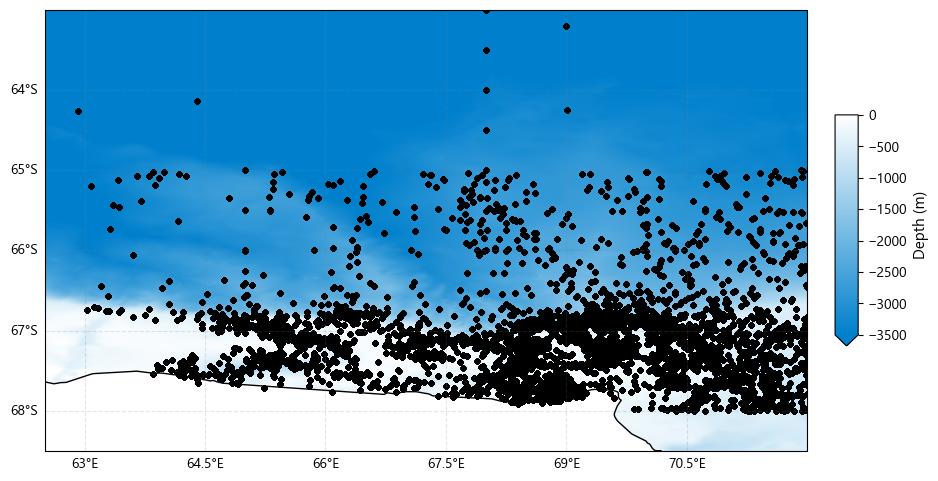

In [63]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from matplotlib import cm
import rasterio.plot
import numpy as np
from matplotlib.colors import LinearSegmentedColormap
import xarray as xr
import cartopy.feature as cfeature
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, zoomed_inset_axes
import cmocean



#### plotting the GEBCO bathymetry data and general map features ####

# Define a custom colormap with light gray color for values >= 0
#cmap = plt.cm.get_cmap('cmo.delta_r')
#cmap = plt.cm.get_cmap('cmo.topo')
#cmap = plt.cm.get_cmap('Blues_r')

#### custom colour map
vmin, vmax = -4000, 0
cmap_colors = [(0, 0.5, 0.8), (1, 1, 1)]
cmap_name = 'custom_blue'
cmap = LinearSegmentedColormap.from_list(cmap_name, cmap_colors)
cmap.set_over('gray')

# Open the NetCDF file with xarray
gebco = xr.open_dataset('bathymetry data/netCDF_CD_bathymetry/GEBCO_30_Apr_2023_950e3c1fe0d8/gebco_2022_n-63.0_s-68.5_w62.5_e72.0.nc', engine='netcdf4')

# Set the figure size
plt.figure(figsize=(12, 10))

# Create a plot of the bathymetry data using Cartopy
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.set_extent([gebco.lon.min(), gebco.lon.max(), gebco.lat.min(), gebco.lat.max()])
Coast = cfeature.NaturalEarthFeature(category='phyiscal',scale='50m',facecolor='none',name='coastline')

# Use the custom colormap with light gray color for values >= 0
elevation = gebco.elevation.where(gebco.elevation < 0, np.nan)
im = elevation.plot.pcolormesh('lon', 'lat', ax=ax, cmap=cmap, vmin=-3500, vmax=0, add_colorbar=False)
#im = elevation.plot.contourf(x='lon',y='lat', ax=ax, cmap='cmo.deep_r',levels=np.array([*np.arange(-3500,250,250)]),add_colorbar=False)


#add on gridlines
#ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
gl = ax.gridlines(draw_labels=True, color='gray', alpha=0.2, linestyle='--')
gl.right_labels = False
gl.top_labels = False


# Add colorbar
cbar = plt.colorbar(im, ax=ax, orientation='vertical', shrink=0.3, pad=0.03, aspect=10, extend='min')
cbar.set_label('Depth (m)', fontsize=11)


# #add colourbar
# cax = inset_axes(ax,
#                 width="3%",  # width = 10% of parent_bbox width
#                 height="50%",  # height : 50%
#                 loc='right',
#                 bbox_to_anchor=(.04,.05, 1, 1),
#                 bbox_transform=ax.transAxes,
#                 borderpad=0,
#                 )
# cbar = fig.colorbar(im, cax=cax) 
# cbar.set_label('Depth (m)', fontsize=12)
# ax = plt.gca()






##### plotting the CTD data on map #####

# Plot the latitude and longitude points on the map
#ax.scatter(longitude, latitude, transform=ccrs.PlateCarree(), s=10, facecolor = 'black', edgecolor = 'white')
ax.scatter(longitude, latitude, transform=ccrs.PlateCarree(), s=10, color = 'black')

# # Add the cast name as text to the plot
# for i, txt in enumerate(data['Names']):
#     ax.text(data['Lon'][i], data['Lat'][i]-0.1, txt, transform=ccrs.PlateCarree(), fontsize=7)


plt.show()

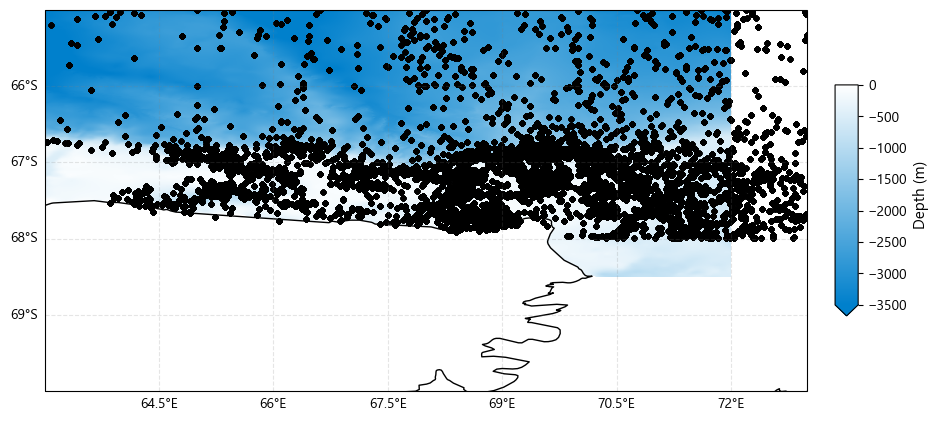

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from matplotlib import cm
import rasterio.plot
import numpy as np
from matplotlib.colors import LinearSegmentedColormap
import xarray as xr
import cartopy.feature as cfeature
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, zoomed_inset_axes
import cmocean



#### plotting the GEBCO bathymetry data and general map features ####

# Define a custom colormap with light gray color for values >= 0
#cmap = plt.cm.get_cmap('cmo.delta_r')
#cmap = plt.cm.get_cmap('cmo.topo')
#cmap = plt.cm.get_cmap('Blues_r')

#### custom colour map
vmin, vmax = -4000, 0
cmap_colors = [(0, 0.5, 0.8), (1, 1, 1)]
cmap_name = 'custom_blue'
cmap = LinearSegmentedColormap.from_list(cmap_name, cmap_colors)
cmap.set_over('gray')

# Open the NetCDF file with xarray
gebco = xr.open_dataset('bathymetry data/netCDF_CD_bathymetry/GEBCO_30_Apr_2023_950e3c1fe0d8/gebco_2022_n-63.0_s-68.5_w62.5_e72.0.nc', engine='netcdf4')

# Set the figure size
plt.figure(figsize=(12, 10))

# Create a plot of the bathymetry data using Cartopy
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
# ax.set_extent([gebco.lon.min(), gebco.lon.max(), gebco.lat.min(), gebco.lat.max()])
ax.set_extent([63, 73, -70, -65])
Coast = cfeature.NaturalEarthFeature(category='phyiscal',scale='50m',facecolor='none',name='coastline')

# Use the custom colormap with light gray color for values >= 0
elevation = gebco.elevation.where(gebco.elevation < 0, np.nan)
im = elevation.plot.pcolormesh('lon', 'lat', ax=ax, cmap=cmap, vmin=-3500, vmax=0, add_colorbar=False)
#im = elevation.plot.contourf(x='lon',y='lat', ax=ax, cmap='cmo.deep_r',levels=np.array([*np.arange(-3500,250,250)]),add_colorbar=False)


#add on gridlines
#ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
gl = ax.gridlines(draw_labels=True, color='gray', alpha=0.2, linestyle='--')
gl.right_labels = False
gl.top_labels = False


# Add colorbar
cbar = plt.colorbar(im, ax=ax, orientation='vertical', shrink=0.3, pad=0.03, aspect=10, extend='min')
cbar.set_label('Depth (m)', fontsize=11)


# #add colourbar
# cax = inset_axes(ax,
#                 width="3%",  # width = 10% of parent_bbox width
#                 height="50%",  # height : 50%
#                 loc='right',
#                 bbox_to_anchor=(.04,.05, 1, 1),
#                 bbox_transform=ax.transAxes,
#                 borderpad=0,
#                 )
# cbar = fig.colorbar(im, cax=cax) 
# cbar.set_label('Depth (m)', fontsize=12)
# ax = plt.gca()






##### plotting the CTD data on map #####

# Plot the latitude and longitude points on the map
#ax.scatter(longitude, latitude, transform=ccrs.PlateCarree(), s=10, facecolor = 'black', edgecolor = 'white')
ax.scatter(longitude, latitude, transform=ccrs.PlateCarree(), s=10, color = 'black')

# # Add the cast name as text to the plot
# for i, txt in enumerate(data['Names']):
#     ax.text(data['Lon'][i], data['Lat'][i]-0.1, txt, transform=ccrs.PlateCarree(), fontsize=7)


plt.show()

In [85]:
# Define the latitude range you want to plot
lat_min = -67
lat_max = -66.5

# Define the longitude range you want to plot
lon_min = 63
lon_max = 73

# Initialize empty lists for each variable
temperature_list = []
cons_temperature_list = []
salinity_list = []
abs_salinity_list = []
oxygen_list = []
latitude_list = []
longitude_list = []
pressure_list = []
depth_list = []
neutral_density_list = []
time_list = []
type_list = []


# Loop over the dictionary and extract the data for each variable
for cast in csv_ctd_data_dict.values():
    temperature_list.append(cast['temperature'])
    cons_temperature_list.append(cast['conservativeTemperature'])
    salinity_list.append(cast['salinity'])
    abs_salinity_list.append(cast['absoluteSalinity'])
    try:
        oxygen_list.append(cast['oxygen'])
    except KeyError:
        pass
    #oxygen_list.append(cast['oxygen'])
    latitude_list.append(cast['latitude'])
    longitude_list.append(cast['longitude'])
    pressure_list.append(cast['pressure'])
    depth_list.append(cast['depth'])
    neutral_density_list.append(cast['neutralDensity'])
    time_list.append(cast['time'])
    type_list.append(cast['type'])



# Convert the lists to NumPy arrays
temperature = np.concatenate(temperature_list)
cons_temperature = np.concatenate(cons_temperature_list)
salinity = np.concatenate(salinity_list)
abs_salinity = np.concatenate(abs_salinity_list)
oxygen = np.concatenate(oxygen_list)
latitude = np.concatenate(latitude_list)
longitude = np.concatenate(longitude_list)
pressure = np.concatenate(pressure_list)
depth = np.concatenate(depth_list)
neutral_density = np.concatenate(neutral_density_list)
time = np.concatenate(time_list)
type = np.concatenate(type_list)


#print(temperature)

#old code for finding cast closest to different depths, but i realised if the closest depth was 200m it would plot that in the 500m one
#so had to update the code so that it only includes 
# # Calculate the absolute difference between the depth values and 10m
# depth_diff = np.abs(depth - 10)
# # depth_diff = np.abs(depth - 500)
# # depth_diff = np.abs(depth - 2000)


# # Create a mask to identify the indices where depth is closest to 10m for each unique latitude and longitude
# indices_closest_depth = []
# unique_lat_lon = np.unique(np.column_stack((latitude, longitude)), axis=0)
# for lat, lon in unique_lat_lon:
#     indices = np.where((latitude == lat) & (longitude == lon))[0]
#     ## use this line if finding depth closest to a particular depth defined above
#     closest_index = indices[np.argmin(depth_diff[indices])]
#     ## use this line if finding the maximum depth (bottom depth)
#     # closest_index = indices[np.argmax(depth[indices])]
#     indices_closest_depth.append(closest_index)





# Define the range within which to search for closest depths
# depth_range = 20  # You can adjust this value as needed
#depth_range = 200 
depth_range = 300 
# depth_range = 2000 


indices_closest_depth = []
unique_lat_lon = np.unique(np.column_stack((latitude, longitude)), axis=0)
for lat, lon in unique_lat_lon:
    indices = np.where((latitude == lat) & (longitude == lon))[0]
    
    # Find indices of depths within the specified range
    #this is for the surface
    #within_range_indices = indices[np.where((depth[indices] >= depth_range - 20) & (depth[indices] <= depth_range + 20))]
    #this is for not surface (just a wider depth range)
    within_range_indices = indices[np.where((depth[indices] >= depth_range - 50) & (depth[indices] <= depth_range + 50 ))]
    
    if len(within_range_indices) > 0:
        # Find the index with the depth closest to 10m within the specified range
        closest_index = within_range_indices[np.argmin(np.abs(depth[within_range_indices] - depth_range))]
        indices_closest_depth.append(closest_index)

# Now, indices_closest_depth contains the indices of the closest depth points within the specified range for each unique latitude and longitude.



#code for when you want to find the bottom of cast
# indices_closest_depth = []
# unique_lat_lon = np.unique(np.column_stack((latitude, longitude)), axis=0)
# for lat, lon in unique_lat_lon:
#     indices = np.where((latitude == lat) & (longitude == lon))[0]
    
#     # Find the index with the largest depth within the specified latitude and longitude
#     largest_depth_index = indices[np.argmax(depth[indices])]
#     indices_closest_depth.append(largest_depth_index)

# # Now, indices_closest_depth contains the indices with the largest depth for each unique latitude and longitude.




# Filter the data based on the indices with closest depth to 10m
filtered_indices = np.array(indices_closest_depth)
filtered_temperature = temperature[filtered_indices]
filtered_cons_temperature = cons_temperature[filtered_indices]
filtered_salinity = salinity[filtered_indices]
filtered_abs_salinity = abs_salinity[filtered_indices]
filtered_oxygen = oxygen[filtered_indices]
filtered_latitude = latitude[filtered_indices]
filtered_longitude = longitude[filtered_indices]
filtered_pressure = pressure[filtered_indices]
filtered_depth = depth[filtered_indices]
filtered_neutral_density = neutral_density[filtered_indices]
filtered_time = time[filtered_indices]
filtered_type = type[filtered_indices]




# print(latitude)
# print(longitude)
#len(filtered_salinity)
len(filtered_latitude)

3099

In [86]:
#Then filter this data by season

# Define the time range you want to plot

# #Autumn
# time_min = 60
# time_max = 151

#Winter
time_min = 152
time_max = 212

# #Spring
# time_min = 213
# time_max = 334

# #summer 
# time_min = 335
# time_max = 59

#Autumn, winter & spring
time_min = 60
time_max = 334



# Filter the data based on latitude
#use this line for autumn, spring & winter
indices_in_range = np.where((filtered_time >= time_min) & (filtered_time <= time_max))[0]
# #use this line for summer
# indices_in_range = np.where(((filtered_time >= 331) & (filtered_time <= 365)) | ((filtered_time >= 0) & (filtered_time <= 60)))[0]
season_cons_temperature_in_range = filtered_cons_temperature[indices_in_range]
season_abs_salinity_in_range = filtered_abs_salinity[indices_in_range]
season_depth_in_range = filtered_depth[indices_in_range]
season_filtered_latitude_in_range = filtered_latitude[indices_in_range]
season_filtered_longitude_in_range = filtered_longitude[indices_in_range]
season_filtered_neutral_density_in_range = neutral_density[indices_in_range]
season_filtered_type_in_range = filtered_type[indices_in_range]


#use this line for autumn, spring & winter
indices_out_range = np.where((filtered_time < time_min) | (filtered_time > time_max))[0]
#use this line for summer
#indices_out_range = np.where((filtered_time < 0) | ((filtered_time > 60) & (filtered_time < 331)) | (filtered_time > 365))[0]
season_cons_temperature_out_range = filtered_cons_temperature[indices_out_range]
season_abs_salinity_out_range = filtered_abs_salinity[indices_out_range]
season_depth_out_range = filtered_depth[indices_out_range]
season_filtered_latitude_out_range = filtered_latitude[indices_out_range]
season_filtered_longitude_out_range = filtered_longitude[indices_out_range]
season_filtered_neutral_density_out_range = neutral_density[indices_out_range]
season_filtered_type_out_range = filtered_type[indices_out_range]

len(season_filtered_longitude_in_range)

2276

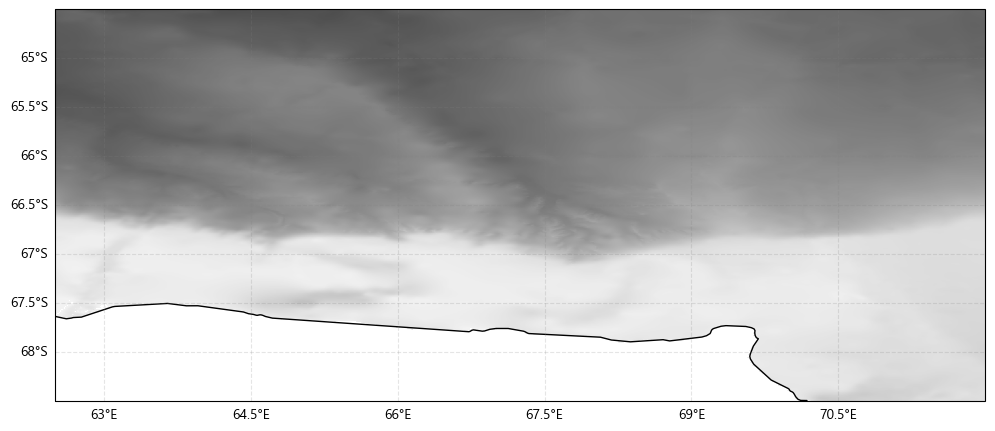

In [87]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from matplotlib import cm
import rasterio.plot
import numpy as np
from matplotlib.colors import LinearSegmentedColormap
import xarray as xr
import cartopy.feature as cfeature
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, zoomed_inset_axes
import cmocean



#### plotting the GEBCO bathymetry data and general map features ####



#### custom colour map
vmin, vmax = -1000, 0
cmap_colors = [(0.3, 0.3, 0.3), (0.95, 0.95, 0.95)]
cmap_name = 'custom_grey'
cmap = LinearSegmentedColormap.from_list(cmap_name, cmap_colors)
cmap.set_over('gray')

# Open the NetCDF file with xarray
gebco = xr.open_dataset('bathymetry data/netCDF_CD_bathymetry/GEBCO_30_Apr_2023_950e3c1fe0d8/gebco_2022_n-63.0_s-68.5_w62.5_e72.0.nc', engine='netcdf4')

# Set the figure size
plt.figure(figsize=(12, 10))

# Create a plot of the bathymetry data using Cartopy
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
# ax.set_extent([gebco.lon.min(), gebco.lon.max(), gebco.lat.min(), gebco.lat.max()])
ax.set_extent([gebco.lon.min(), gebco.lon.max(), -68.5, -64.5])
Coast = cfeature.NaturalEarthFeature(category='phyiscal',scale='50m',facecolor='none',name='coastline')

# Use the custom colormap with light gray color for values >= 0
elevation = gebco.elevation.where(gebco.elevation < 0, np.nan)
im = elevation.plot.pcolormesh('lon', 'lat', ax=ax, cmap=cmap, vmin=-4000, vmax=0, add_colorbar=False)


#add on gridlines
#ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
gl = ax.gridlines(draw_labels=True, color='gray', alpha=0.2, linestyle='--')
gl.right_labels = False
gl.top_labels = False


# # Add colorbar
# cbar = plt.colorbar(im, ax=ax, orientation='vertical', shrink=0.3, pad=0.03, aspect=10, extend='min')
# cbar.set_label('Depth (m)', fontsize=11)



plt.show()

In [90]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import xarray as xr
from matplotlib.colors import LinearSegmentedColormap

#### custom colour map for bathymetry
vmin, vmax = -1000, 0
cmap_colors = [(0.3, 0.3, 0.3), (0.95, 0.95, 0.95)]
cmap_name = 'custom_grey'
cmap = LinearSegmentedColormap.from_list(cmap_name, cmap_colors)
cmap.set_over('gray')

# Open the NetCDF file with xarray
gebco = xr.open_dataset('bathymetry data/netCDF_CD_bathymetry/GEBCO_30_Apr_2023_950e3c1fe0d8/gebco_2022_n-63.0_s-68.5_w62.5_e72.0.nc', engine='netcdf4')

# Set up the figure and axes for bathymetry map
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.coastlines()
ax.set_extent([gebco.lon.min(), gebco.lon.max(), -68.5, -64.5])
Coast = cfeature.NaturalEarthFeature(category='physical', scale='50m', facecolor='none', name='coastline')

# Use the custom colormap for bathymetry
elevation = gebco.elevation.where(gebco.elevation < 0, np.nan)
im = elevation.plot.pcolormesh('lon', 'lat', ax=ax, cmap=cmap, vmin=-4000, vmax=0, add_colorbar=False)

# Add gridlines
gl = ax.gridlines(draw_labels=True, color='gray', alpha=0.2, linestyle='--')
gl.right_labels = False
gl.top_labels = False

# Create a scatter plot of points colored by conservative temperature
seals_scatter = ax.scatter(seals_longitude, seals_latitude, transform=ccrs.PlateCarree(),
                           s=10, c=seals_cons_temperature, cmap=cmap_temp, vmax=-0.5, marker='o', label='Seals')

ships_scatter = ax.scatter(ships_longitude, ships_latitude, transform=ccrs.PlateCarree(),
                           s=40, c=ships_cons_temperature, cmap=cmap_temp, vmax=-0.5, marker='^', label='Ships')

# Add colorbar for the scatter plot
cbar = plt.colorbar(seals_scatter, ax=ax, orientation='vertical', shrink=0.3, pad=0.03, aspect=10, extend='both')
cbar.set_label('Conservative Temperature (°C)', fontsize=11)

# Create a legend
legend = ax.legend()
for handle in legend.legend_handles:
    handle.set_color('black')

# Add a dynamic title
plt.title(f'Conservative Temperature at {depth_range}m', fontsize=16)

plt.show()


KeyboardInterrupt: 

C:\Users\sienn\AppData\Local\Temp\ipykernel_21260\82284867.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap_temp = plt.cm.get_cmap('cmo.thermal')


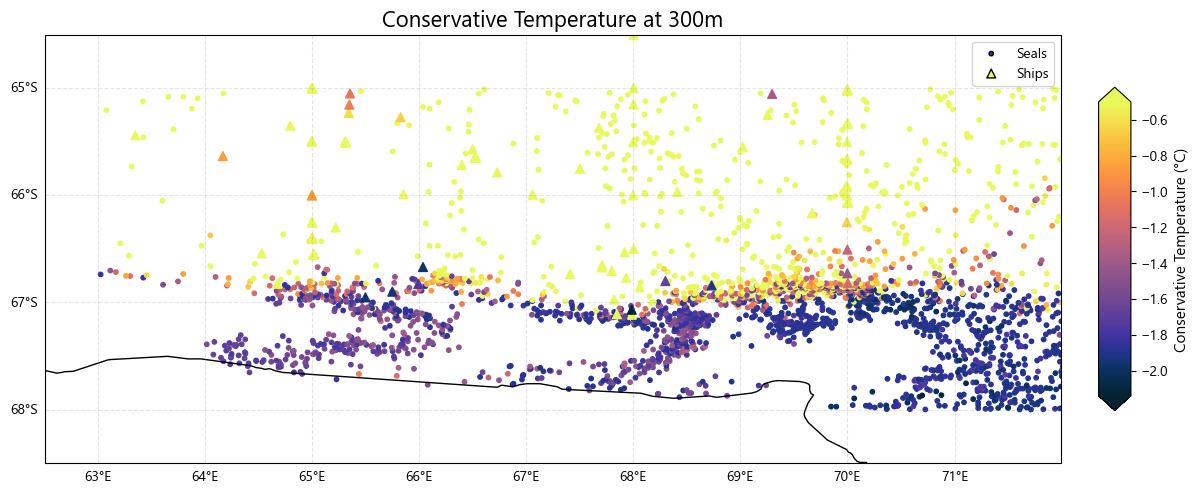

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from matplotlib import cm
import rasterio.plot
import numpy as np
from matplotlib.colors import LinearSegmentedColormap
import xarray as xr
import cartopy.feature as cfeature
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, zoomed_inset_axes
import cmocean


cmap_temp = plt.cm.get_cmap('cmo.thermal')


# Create a figure and an axes object using cartopy projection
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(16, 14))





#### custom colour map
vmin, vmax = -4000, 0
cmap_colors = [(0, 0.5, 0.8), (1, 1, 1)]
cmap_name = 'custom_blue'
cmap = LinearSegmentedColormap.from_list(cmap_name, cmap_colors)
cmap.set_over('gray')

# Open the NetCDF file with xarray
gebco = xr.open_dataset('bathymetry data/netCDF_CD_bathymetry/GEBCO_30_Apr_2023_950e3c1fe0d8/gebco_2022_n-63.0_s-68.5_w62.5_e72.0.nc', engine='netcdf4')

# # Use the custom colormap with light gray color for values >= 0
# elevation = gebco.elevation.where(gebco.elevation < 0, np.nan)
# im = elevation.plot.pcolormesh('lon', 'lat', ax=ax, cmap=cmap, vmin=-4000, vmax=0, add_colorbar=False)

# Add colorbar
# cbar = plt.colorbar(im, ax=ax, orientation='horizontal', shrink=0.5, pad=0.1, extend='min')
# cbar.set_label('Depth (m)', fontsize=11)

# ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)








# Create a plot of the bathymetry data using Cartopy
# ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
#ax.set_extent([gebco.lon.min(), gebco.lon.max(), gebco.lat.min(), gebco.lat.max()])
ax.set_extent([gebco.lon.min(), gebco.lon.max(), -68.5, -64.5])
Coast = cfeature.NaturalEarthFeature(category='phyiscal',scale='50m',facecolor='none',name='coastline')

# Use the custom colormap with light gray color for values >= 0
elevation = gebco.elevation.where(gebco.elevation < 0, np.nan)
#im = elevation.plot.pcolormesh('lon', 'lat', ax=ax, cmap=cmap, vmin=-3500, vmax=0, add_colorbar=False)
#im = elevation.plot.contourf(x='lon',y='lat', ax=ax, cmap='cmo.deep_r',levels=np.array([*np.arange(-3500,250,250)]),add_colorbar=False)


#add on gridlines
#ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
gl = ax.gridlines(draw_labels=True, color='gray', alpha=0.2, linestyle='--', xlocs=np.arange(63, 73, 1), ylocs=np.arange(-69, -63, 1))
gl.right_labels = False
gl.top_labels = False



# Filter the data for seals and ships separately
seals_data = filtered_type == 1
ships_data = filtered_type == 2

seals_latitude = filtered_latitude[seals_data]
seals_longitude = filtered_longitude[seals_data]
seals_cons_temperature = filtered_cons_temperature[seals_data]

ships_latitude = filtered_latitude[ships_data]
ships_longitude = filtered_longitude[ships_data]
ships_cons_temperature = filtered_cons_temperature[ships_data]


# Plot the scatter plot with temperature-based coloring and different marker shapes for seals and ships
seals_scatter = ax.scatter(seals_longitude, seals_latitude, transform=ccrs.PlateCarree(),
                           s=10, c=seals_cons_temperature, cmap=cmap_temp, vmax=-0.5, marker='o', label='Seals')

ships_scatter = ax.scatter(ships_longitude, ships_latitude, transform=ccrs.PlateCarree(),
                           s=40, c=ships_cons_temperature, cmap=cmap_temp, vmax=-0.5, marker='^', label='Ships')


# ## Plot the scatter plot with temperature-based coloring
# #use this line to plot all data together
# scatter = ax.scatter(filtered_longitude, filtered_latitude, transform=ccrs.PlateCarree(), s=10, c=filtered_cons_temperature, cmap=cmap, vmax = -0.5)
# # use this line to plot by season
# # scatter = ax.scatter(season_filtered_longitude_in_range, season_filtered_latitude_in_range, transform=ccrs.PlateCarree(), s=20, c=season_cons_temperature_in_range, cmap=cmap, vmax = -0.5)


# # Add colorbar
cbar = plt.colorbar(seals_scatter, ax=ax, orientation='vertical', shrink=0.3, pad=0.03, aspect=10, extend='both')
cbar.set_label('Conservative Temperature (°C)', fontsize=11)


# Create a legend
legend = ax.legend()

# Set the color of legend handles to black
for handle in legend.legend_handles:
    handle.set_color('black')


##### plotting the CTD data on map #####

# # Add the cast name as text to the plot
# for i, txt in enumerate(data['Names']):
#     ax.text(data['Lon'][i], data['Lat'][i]-0.1, txt, transform=ccrs.PlateCarree(), fontsize=7)

# Add a dynamic title
plt.title(f'Conservative Temperature at {depth_range}m', fontsize=16)

plt.show()

C:\Users\sienn\AppData\Local\Temp\ipykernel_25152\3774558967.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap_temp = plt.cm.get_cmap('cmo.thermal')


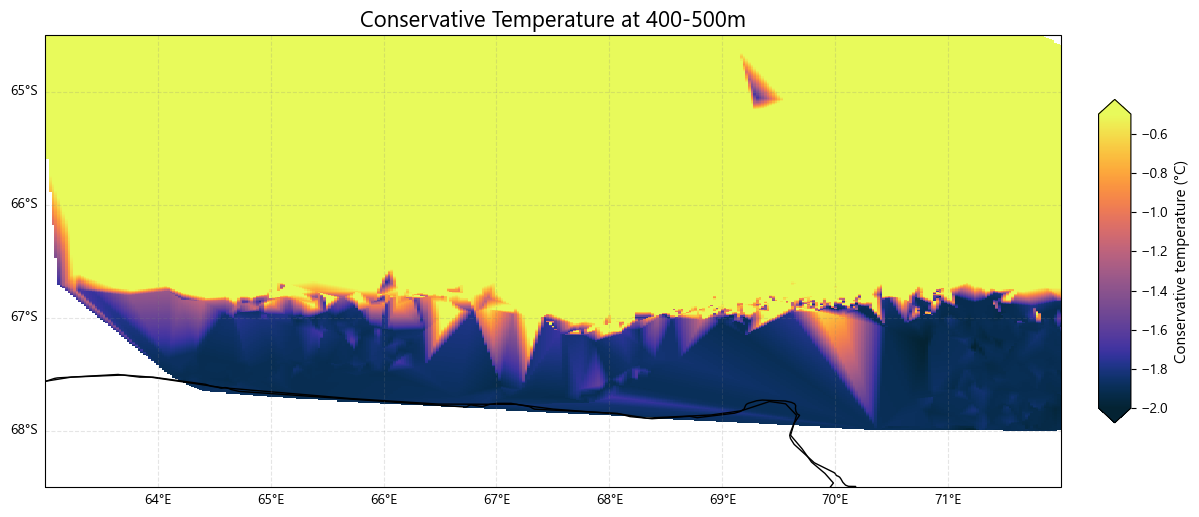

In [133]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from scipy.interpolate import griddata

cmap_temp = plt.cm.get_cmap('cmo.thermal')

# Assuming you have organized data in the following format:
# depth_values = array of depth values
# longitude = array of longitudes
# latitude = array of latitudes
# temperature = array of temperature values corresponding to each point

# Define custom depth ranges
#depth_ranges = [(0, 50), (50, 100), (100, 200), (200, 300), (300, 400), (400, 500), (500, 1000), (1000, 2000), (2000, 4000)]  # Add more ranges as needed
depth_ranges = [(400, 500)]

# Interpolation method (e.g., 'cubic', 'quintic', 'nearest')
interpolation_method = 'cubic'


# Open the NetCDF file with xarray
gebco = xr.open_dataset('bathymetry data/netCDF_CD_bathymetry/GEBCO_30_Apr_2023_950e3c1fe0d8/gebco_2022_n-63.0_s-68.5_w62.5_e72.0.nc', engine='netcdf4')




# Iterate through custom depth ranges
for depth_range in depth_ranges:
    min_depth, max_depth = depth_range
    
    # Filter data for the current depth range
    depth_mask = (depth >= min_depth) & (depth <= max_depth)
    filtered_longitude = longitude[depth_mask]
    filtered_latitude = latitude[depth_mask]
    filtered_cons_temperature = cons_temperature[depth_mask]

    # Define a grid
    lon_grid, lat_grid = np.meshgrid(np.linspace(gebco.lon.min(), gebco.lon.max(), 400),
                        np.linspace(-68.5, -64.5, 400))


    # Create a figure and axes
    plt.figure(figsize=(16, 14))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.coastlines()

    # Interpolate data onto the grid
    #other interpolation methods can try: cubic, quintic, nearest, linear
    interpolated_cons_temperature = griddata((filtered_longitude, filtered_latitude),
                                         filtered_cons_temperature, (lon_grid, lat_grid), method='linear')

    # Plot the mesh plot
    mesh = ax.pcolormesh(lon_grid, lat_grid, interpolated_cons_temperature,
                         transform=ccrs.PlateCarree(), shading='auto', cmap=cmap_temp, vmin=-2, vmax = -0.5)
    
    # Add colorbar for each depth range
    cbar = plt.colorbar(mesh, ax=ax, orientation='vertical', shrink=0.3, pad=0.03, aspect=10, extend='both')
    cbar.set_label(f'Conservative temperature (°C)', fontsize=11)


# Customize plot settings and show
ax.set_extent([63, 72, -68.5, -64.5])
gl = ax.gridlines(draw_labels=True, color='gray', alpha=0.2, linestyle='--', xlocs=np.arange(63, 73, 1), ylocs=np.arange(-69, -63, 1))
gl.right_labels = False
gl.top_labels = False
ax.add_feature(cfeature.NaturalEarthFeature(category='physical', scale='50m', facecolor='none', name='coastline'))
# Add a dynamic title
plt.title(f'Conservative Temperature at {min_depth}-{max_depth}m', fontsize=16)
plt.show()


C:\Users\sienn\AppData\Local\Temp\ipykernel_21260\4023925907.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap_salt = plt.cm.get_cmap('cmo.haline')
C:\Users\sienn\AppData\Local\Temp\ipykernel_21260\4023925907.py:117: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend.legendHandles:


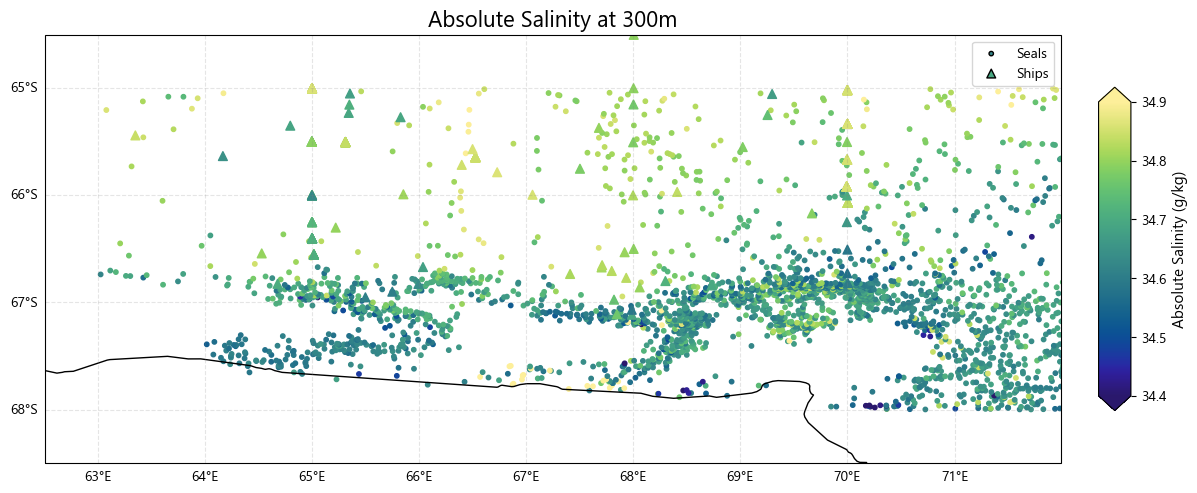

In [257]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from matplotlib import cm
import rasterio.plot
import numpy as np
from matplotlib.colors import LinearSegmentedColormap
import xarray as xr
import cartopy.feature as cfeature
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, zoomed_inset_axes
import cmocean


cmap_salt = plt.cm.get_cmap('cmo.haline')


# Create a figure and an axes object using cartopy projection
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(16, 14))





#### custom colour map
vmin, vmax = -4000, 0
cmap_colors = [(0, 0.5, 0.8), (1, 1, 1)]
cmap_name = 'custom_blue'
cmap = LinearSegmentedColormap.from_list(cmap_name, cmap_colors)
cmap.set_over('gray')

# Open the NetCDF file with xarray
gebco = xr.open_dataset('bathymetry data/netCDF_CD_bathymetry/GEBCO_30_Apr_2023_950e3c1fe0d8/gebco_2022_n-63.0_s-68.5_w62.5_e72.0.nc', engine='netcdf4')

# # Use the custom colormap with light gray color for values >= 0
# elevation = gebco.elevation.where(gebco.elevation < 0, np.nan)
# im = elevation.plot.pcolormesh('lon', 'lat', ax=ax, cmap=cmap, vmin=-4000, vmax=0, add_colorbar=False)

# Add colorbar
# cbar = plt.colorbar(im, ax=ax, orientation='horizontal', shrink=0.5, pad=0.1, extend='min')
# cbar.set_label('Depth (m)', fontsize=11)

# ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)








# Create a plot of the bathymetry data using Cartopy
# ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
#ax.set_extent([gebco.lon.min(), gebco.lon.max(), gebco.lat.min(), gebco.lat.max()])
ax.set_extent([gebco.lon.min(), gebco.lon.max(), -68.5, -64.5])
Coast = cfeature.NaturalEarthFeature(category='phyiscal',scale='50m',facecolor='none',name='coastline')

# Use the custom colormap with light gray color for values >= 0
elevation = gebco.elevation.where(gebco.elevation < 0, np.nan)
#im = elevation.plot.pcolormesh('lon', 'lat', ax=ax, cmap=cmap, vmin=-3500, vmax=0, add_colorbar=False)
#im = elevation.plot.contourf(x='lon',y='lat', ax=ax, cmap='cmo.deep_r',levels=np.array([*np.arange(-3500,250,250)]),add_colorbar=False)


#add on gridlines
#ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
gl = ax.gridlines(draw_labels=True, color='gray', alpha=0.2, linestyle='--', xlocs=np.arange(63, 73, 1), ylocs=np.arange(-69, -63, 1))
gl.right_labels = False
gl.top_labels = False



# Filter the data for seals and ships separately
seals_data = filtered_type == 1
ships_data = filtered_type == 2

seals_latitude = filtered_latitude[seals_data]
seals_longitude = filtered_longitude[seals_data]
seals_abs_salinity = filtered_abs_salinity[seals_data]

ships_latitude = filtered_latitude[ships_data]
ships_longitude = filtered_longitude[ships_data]
ships_abs_salinity = filtered_abs_salinity[ships_data]


# Plot the scatter plot with temperature-based coloring and different marker shapes for seals and ships
seals_scatter = ax.scatter(seals_longitude, seals_latitude, transform=ccrs.PlateCarree(),
                           s=10, c=seals_abs_salinity, cmap=cmap_salt, vmin = 34.4, vmax=34.9, marker='o', label='Seals')

ships_scatter = ax.scatter(ships_longitude, ships_latitude, transform=ccrs.PlateCarree(),
                           s=40, c=ships_abs_salinity, cmap=cmap_salt, vmin = 34.4, vmax=34.9, marker='^', label='Ships')


# ## Plot the scatter plot with temperature-based coloring
# #use this line to plot all data together
# scatter = ax.scatter(filtered_longitude, filtered_latitude, transform=ccrs.PlateCarree(), s=10, c=filtered_cons_temperature, cmap=cmap, vmax = -0.5)
# # use this line to plot by season
# # scatter = ax.scatter(season_filtered_longitude_in_range, season_filtered_latitude_in_range, transform=ccrs.PlateCarree(), s=20, c=season_cons_temperature_in_range, cmap=cmap, vmax = -0.5)


# # Add colorbar
cbar = plt.colorbar(seals_scatter, ax=ax, orientation='vertical', shrink=0.3, pad=0.03, aspect=10, extend='both')
cbar.set_label('Absolute Salinity (g/kg)', fontsize=11)


##### plotting the CTD data on map #####

# # Add the cast name as text to the plot
# for i, txt in enumerate(data['Names']):
#     ax.text(data['Lon'][i], data['Lat'][i]-0.1, txt, transform=ccrs.PlateCarree(), fontsize=7)

# Create a legend
legend = ax.legend()

# Set the color of legend handles to black
for handle in legend.legendHandles:
    handle.set_color('black')

# Add a dynamic title
plt.title(f'Absolute Salinity at {depth_range}m', fontsize=16)

plt.show()

C:\Users\sienn\AppData\Local\Temp\ipykernel_21260\203284786.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap_dens = plt.cm.get_cmap('cmo.dense')
C:\Users\sienn\AppData\Local\Temp\ipykernel_21260\203284786.py:94: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend.legendHandles:


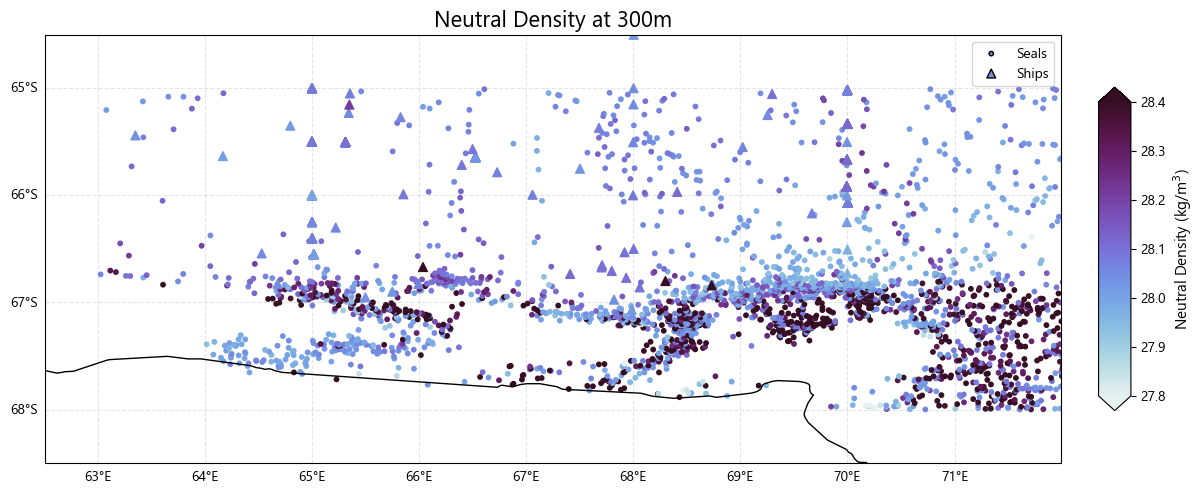

In [254]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from matplotlib import cm
import rasterio.plot
import numpy as np
from matplotlib.colors import LinearSegmentedColormap
import xarray as xr
import cartopy.feature as cfeature
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, zoomed_inset_axes
import cmocean


cmap_dens = plt.cm.get_cmap('cmo.dense')


# Create a figure and an axes object using cartopy projection
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(16, 14))



# Open the NetCDF file with xarray
gebco = xr.open_dataset('bathymetry data/netCDF_CD_bathymetry/GEBCO_30_Apr_2023_950e3c1fe0d8/gebco_2022_n-63.0_s-68.5_w62.5_e72.0.nc', engine='netcdf4')


# Create a plot of the bathymetry data using Cartopy
# ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
#ax.set_extent([gebco.lon.min(), gebco.lon.max(), gebco.lat.min(), gebco.lat.max()])
ax.set_extent([gebco.lon.min(), gebco.lon.max(), -68.5, -64.5])
Coast = cfeature.NaturalEarthFeature(category='phyiscal',scale='50m',facecolor='none',name='coastline')

# Use the custom colormap with light gray color for values >= 0
elevation = gebco.elevation.where(gebco.elevation < 0, np.nan)
#im = elevation.plot.pcolormesh('lon', 'lat', ax=ax, cmap=cmap, vmin=-3500, vmax=0, add_colorbar=False)
#im = elevation.plot.contourf(x='lon',y='lat', ax=ax, cmap='cmo.deep_r',levels=np.array([*np.arange(-3500,250,250)]),add_colorbar=False)



#add on gridlines
#ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
gl = ax.gridlines(draw_labels=True, color='gray', alpha=0.2, linestyle='--', xlocs=np.arange(63, 73, 1), ylocs=np.arange(-69, -63, 1))
gl.right_labels = False
gl.top_labels = False



# Filter the data for seals and ships separately
seals_data = filtered_type == 1
ships_data = filtered_type == 2

seals_latitude = filtered_latitude[seals_data]
seals_longitude = filtered_longitude[seals_data]
seals_neutral_density = filtered_neutral_density[seals_data]

ships_latitude = filtered_latitude[ships_data]
ships_longitude = filtered_longitude[ships_data]
ships_neutral_density = filtered_neutral_density[ships_data]


# Plot the scatter plot with temperature-based coloring and different marker shapes for seals and ships
seals_scatter = ax.scatter(seals_longitude, seals_latitude, transform=ccrs.PlateCarree(),
                           s=10, c=seals_neutral_density, cmap=cmap_dens, vmin = 27.8, vmax=28.4, marker='o', label='Seals')

ships_scatter = ax.scatter(ships_longitude, ships_latitude, transform=ccrs.PlateCarree(),
                           s=40, c=ships_neutral_density, cmap=cmap_dens, vmin = 27.8, vmax=28.4, marker='^', label='Ships')


# ## Plot the scatter plot with temperature-based coloring
# #use this line to plot all data together
# scatter = ax.scatter(filtered_longitude, filtered_latitude, transform=ccrs.PlateCarree(), s=10, c=filtered_cons_temperature, cmap=cmap, vmax = -0.5)
# # use this line to plot by season
# # scatter = ax.scatter(season_filtered_longitude_in_range, season_filtered_latitude_in_range, transform=ccrs.PlateCarree(), s=20, c=season_cons_temperature_in_range, cmap=cmap, vmax = -0.5)


# # Add colorbar
cbar = plt.colorbar(seals_scatter, ax=ax, orientation='vertical', shrink=0.3, pad=0.03, aspect=10, extend='both')
cbar.set_label('Neutral Density (kg/m$^3$)', fontsize=11)


##### plotting the CTD data on map #####

# # Add the cast name as text to the plot
# for i, txt in enumerate(data['Names']):
#     ax.text(data['Lon'][i], data['Lat'][i]-0.1, txt, transform=ccrs.PlateCarree(), fontsize=7)


# Create a legend
legend = ax.legend()

# Set the color of legend handles to black
for handle in legend.legendHandles:
    handle.set_color('black')


# Add a dynamic title
plt.title(f'Neutral Density at {depth_range}m', fontsize=16)

plt.show()

C:\Users\sienn\AppData\Local\Temp\ipykernel_25152\3530097654.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap_deep = plt.cm.get_cmap('cmo.deep')
C:\Users\sienn\AppData\Local\Temp\ipykernel_25152\3530097654.py:107: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend.legendHandles:


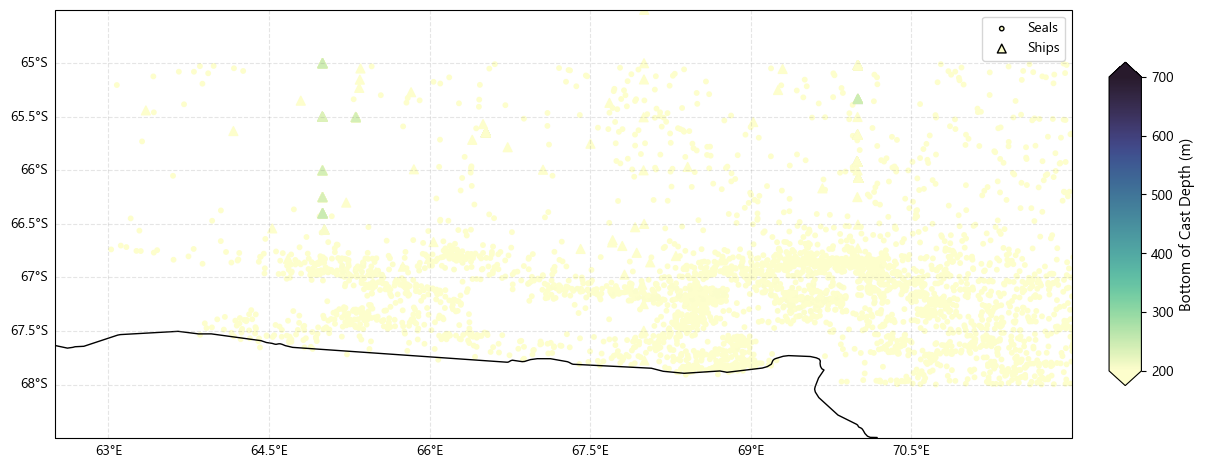

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from matplotlib import cm
import rasterio.plot
import numpy as np
from matplotlib.colors import LinearSegmentedColormap
import xarray as xr
import cartopy.feature as cfeature
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, zoomed_inset_axes
import cmocean



# code for when you want to find the bottom of cast
indices_closest_depth = []
unique_lat_lon = np.unique(np.column_stack((latitude, longitude)), axis=0)
for lat, lon in unique_lat_lon:
    indices = np.where((latitude == lat) & (longitude == lon))[0]
    
    # Find the index with the largest depth within the specified latitude and longitude
    largest_depth_index = indices[np.argmax(depth[indices])]
    indices_closest_depth.append(largest_depth_index)

# Now, indices_closest_depth contains the indices with the largest depth for each unique latitude and longitude.


cmap_deep = plt.cm.get_cmap('cmo.deep')


# Create a figure and an axes object using cartopy projection
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(16, 14))





#### custom colour map
vmin, vmax = -4000, 0
cmap_colors = [(0, 0.5, 0.8), (1, 1, 1)]
cmap_name = 'custom_blue'
cmap = LinearSegmentedColormap.from_list(cmap_name, cmap_colors)
cmap.set_over('gray')

# Open the NetCDF file with xarray
gebco = xr.open_dataset('bathymetry data/netCDF_CD_bathymetry/GEBCO_30_Apr_2023_950e3c1fe0d8/gebco_2022_n-63.0_s-68.5_w62.5_e72.0.nc', engine='netcdf4')

# # Use the custom colormap with light gray color for values >= 0
# elevation = gebco.elevation.where(gebco.elevation < 0, np.nan)
# im = elevation.plot.pcolormesh('lon', 'lat', ax=ax, cmap=cmap, vmin=-4000, vmax=0, add_colorbar=False)

# Add colorbar
# cbar = plt.colorbar(im, ax=ax, orientation='horizontal', shrink=0.5, pad=0.1, extend='min')
# cbar.set_label('Depth (m)', fontsize=11)

# ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)








# Create a plot of the bathymetry data using Cartopy
# ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
#ax.set_extent([gebco.lon.min(), gebco.lon.max(), gebco.lat.min(), gebco.lat.max()])
ax.set_extent([gebco.lon.min(), gebco.lon.max(), -68.5, -64.5])
Coast = cfeature.NaturalEarthFeature(category='phyiscal',scale='50m',facecolor='none',name='coastline')

# Use the custom colormap with light gray color for values >= 0
elevation = gebco.elevation.where(gebco.elevation < 0, np.nan)
#im = elevation.plot.pcolormesh('lon', 'lat', ax=ax, cmap=cmap, vmin=-3500, vmax=0, add_colorbar=False)
#im = elevation.plot.contourf(x='lon',y='lat', ax=ax, cmap='cmo.deep_r',levels=np.array([*np.arange(-3500,250,250)]),add_colorbar=False)


#add on gridlines
#ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
gl = ax.gridlines(draw_labels=True, color='gray', alpha=0.2, linestyle='--', xlocs=np.arange(63, 73, 1), ylocs=np.arange(-69, -63, 1))
gl.right_labels = False
gl.top_labels = False



# Filter the data for seals and ships separately
seals_data = filtered_type == 1
ships_data = filtered_type == 2

seals_latitude = filtered_latitude[seals_data]
seals_longitude = filtered_longitude[seals_data]
seals_depth = filtered_depth[seals_data]

ships_latitude = filtered_latitude[ships_data]
ships_longitude = filtered_longitude[ships_data]
ships_depth = filtered_depth[ships_data]


# Plot the scatter plot with temperature-based coloring and different marker shapes for seals and ships
seals_scatter = ax.scatter(seals_longitude, seals_latitude, transform=ccrs.PlateCarree(),
                           s=10, c=seals_depth, cmap=cmap_deep, vmin = 200, vmax=700, marker='o', label='Seals')

ships_scatter = ax.scatter(ships_longitude, ships_latitude, transform=ccrs.PlateCarree(),
                           s=40, c=ships_depth, cmap=cmap_deep, vmin = 200, vmax=700, marker='^', label='Ships')


# ## Plot the scatter plot with temperature-based coloring
# #use this line to plot all data together
# scatter = ax.scatter(filtered_longitude, filtered_latitude, transform=ccrs.PlateCarree(), s=10, c=filtered_cons_temperature, cmap=cmap, vmax = -0.5)
# # use this line to plot by season
# # scatter = ax.scatter(season_filtered_longitude_in_range, season_filtered_latitude_in_range, transform=ccrs.PlateCarree(), s=20, c=season_cons_temperature_in_range, cmap=cmap, vmax = -0.5)



# Create a legend
legend = ax.legend()

# Set the color of legend handles to black
for handle in legend.legendHandles:
    handle.set_color('black')

# Add colorbar
cbar = plt.colorbar(seals_scatter, ax=ax, orientation='vertical', shrink=0.3, pad=0.03, aspect=10, extend='both')
cbar.set_label('Bottom of Cast Depth (m)', fontsize=11)

# ##### plotting the CTD data on map #####

# # # Add the cast name as text to the plot
# # for i, txt in enumerate(data['Names']):
# #     ax.text(data['Lon'][i], data['Lat'][i]-0.1, txt, transform=ccrs.PlateCarree(), fontsize=7)


plt.show()

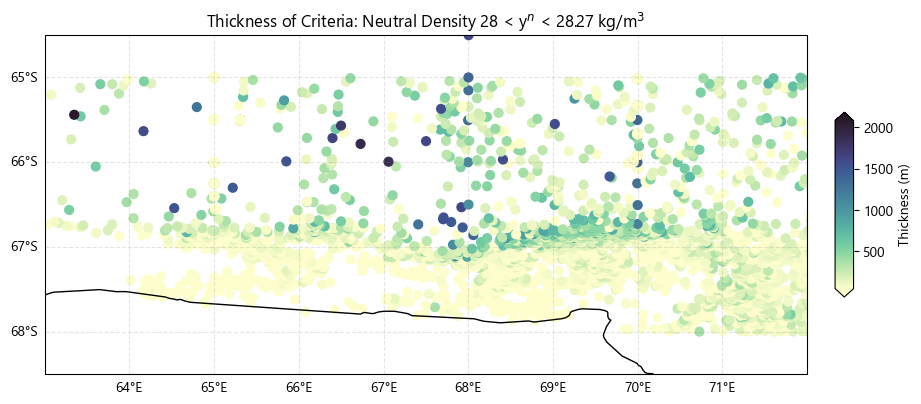

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# Assuming you already have the data loaded into the respective arrays

# Filter data based on criteria (neutral_density < 28 and depth < 2000)
# #AASW
# criteria_indices = np.where((neutral_density < 28) & (depth < 700))
#CDW/mCDW
criteria_indices = np.where((neutral_density > 28) & (neutral_density < 28.27))


# Create a DataFrame with the filtered data
filtered_data = pd.DataFrame({
    'latitude': latitude[criteria_indices],
    'longitude': longitude[criteria_indices],
    'depth': depth[criteria_indices]
})

# Group the data by unique latitude and longitude and calculate thickness
grouped = filtered_data.groupby(['latitude', 'longitude'])
thickness = grouped['depth'].apply(lambda x: np.max(x) - np.min(x)).reset_index(name='thickness')

# Set up the map
plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.set_extent([63, 72, -68.5, -64.5], crs=ccrs.PlateCarree())
#ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
gl = ax.gridlines(draw_labels=True, color='gray', alpha=0.2, linestyle='--', xlocs=np.arange(63, 73, 1), ylocs=np.arange(-69, -63, 1))
gl.right_labels = False
gl.top_labels = False


# Plot the thickness data on the map
sc = ax.scatter(thickness['longitude'], thickness['latitude'], c=thickness['thickness'], cmap=cmap_deep, s=40, marker='o', transform=ccrs.PlateCarree(), vmin = 50)
plt.colorbar(sc, orientation='vertical', shrink=0.3, pad=0.03, aspect=10, extend='both', label='Thickness (m)')

# cbar = plt.colorbar(sc, orientation='vertical', shrink=0.3, pad=0.03, aspect=10, extend='both')
# cbar.set_label(f'Thickness (m)', fontsize=11)

# plt.title('Thickness of Criteria: Neutral Density < 28 kg/m$^3$, Depth < 700m')
plt.title('Thickness of Criteria: Neutral Density 28 < y$^n$ < 28.27 kg/m$^3$')
plt.show()


C:\Users\sienn\AppData\Local\Temp\ipykernel_21260\887842776.py:47: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap_deep = plt.cm.get_cmap('cmo.deep')


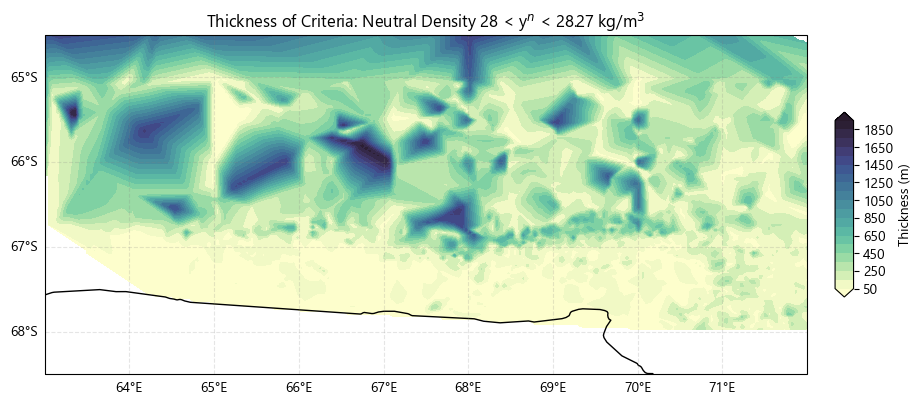

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from scipy.interpolate import griddata

# Filter data based on criteria (neutral_density < 28 and depth < 2000)
# #AASW
# criteria_indices = np.where((neutral_density < 28) & (depth < 700))
#CDW/mCDW
criteria_indices = np.where((neutral_density > 28) & (neutral_density < 28.27))


# Create a DataFrame with the filtered data
filtered_data = pd.DataFrame({
    'latitude': latitude[criteria_indices],
    'longitude': longitude[criteria_indices],
    'depth': depth[criteria_indices]
})

# Group the data by unique latitude and longitude and calculate thickness
grouped = filtered_data.groupby(['latitude', 'longitude'])
thickness = grouped['depth'].apply(lambda x: np.max(x) - np.min(x)).reset_index(name='thickness')

# Define the grid over which you want to interpolate the data
grid_longitude = np.linspace(63, 72, 200)  # Adjust the number of points for your desired resolution
grid_latitude = np.linspace(-69, -63, 200)  # Adjust the number of points for your desired resolution
grid_lon, grid_lat = np.meshgrid(grid_longitude, grid_latitude)

# Interpolate the thickness values onto the grid
grid_thickness = griddata(
    (thickness['longitude'], thickness['latitude']),
    thickness['thickness'],
    (grid_lon, grid_lat),
    method='linear'  # You can also use 'cubic' for smoother interpolation
)

# Set up the map
plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.set_extent([63, 72, -68.5, -64.5], crs=ccrs.PlateCarree())
gl = ax.gridlines(draw_labels=True, color='gray', alpha=0.2, linestyle='--', xlocs=np.arange(63, 73, 1), ylocs=np.arange(-69, -63, 1))
gl.right_labels = False
gl.top_labels = False

cmap_deep = plt.cm.get_cmap('cmo.deep')
# Reverse the 'viridis' colormap
cmap_rev = plt.cm.viridis.reversed()

# Plot the interpolated thickness data on the map
#sc = ax.pcolormesh(grid_lon, grid_lat, grid_thickness, cmap='viridis', transform=ccrs.PlateCarree(), shading='auto', vmin=50, vmax=300)
sc = ax.contourf(grid_lon, grid_lat, grid_thickness, cmap=cmap_deep, transform=ccrs.PlateCarree(), levels = np.arange(50,2000,100), extend = 'both')
plt.colorbar(sc, orientation='vertical', shrink=0.3, pad=0.03, aspect=10, extend='both', label='Thickness (m)')

# plt.title('Thickness of AASW (Neutral Density < 28 kg/m$^3$ & Depth < 700m)')
plt.title('Thickness of Criteria: Neutral Density 28 < y$^n$ < 28.27 kg/m$^3$')
plt.show()


In [ ]:
######this is code for plotting 300m all seasons 

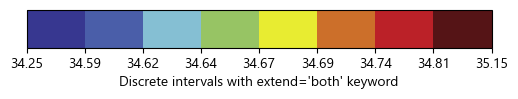

In [273]:
from matplotlib.ticker import FuncFormatter

fig, ax = plt.subplots(figsize=(6, 1))
fig.subplots_adjust(bottom=0.5)

# cmap_deep = plt.cm.get_cmap('cmo.deep')
cmap_deep = mpl.colors.ListedColormap(['#373790', '#4a5ea9', '#85bfd3', '#97c464', '#e8ec31', '#cc6f2a', '#bb2128', '#551416'])

# Calculate percentiles to divide the data into 8 equal parts
#percentiles = np.percentile(thickness['thickness'], np.arange(0, 101, 12.5))  # 0%, 12.5%, 25%, ..., 100%
#percentiles = np.percentile(filtered_cons_temperature, np.arange(0, 101, 12.5))  # 0%, 12.5%, 25%, ..., 100%
percentiles = np.percentile(filtered_abs_salinity, np.arange(0, 101, 12.5))  # 0%, 12.5%, 25%, ..., 100%

norm = mpl.colors.BoundaryNorm(percentiles, cmap_deep.N)


def format_ticks(x, pos):
    return f'{x:.2f}'

formatter = FuncFormatter(format_ticks)

fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap_deep),
             cax=ax, orientation='horizontal',
             label="Discrete intervals with extend='both' keyword", format=formatter)

C:\Users\sienn\AppData\Local\Temp\ipykernel_21260\1981979746.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap_temp = plt.cm.get_cmap('cmo.thermal')


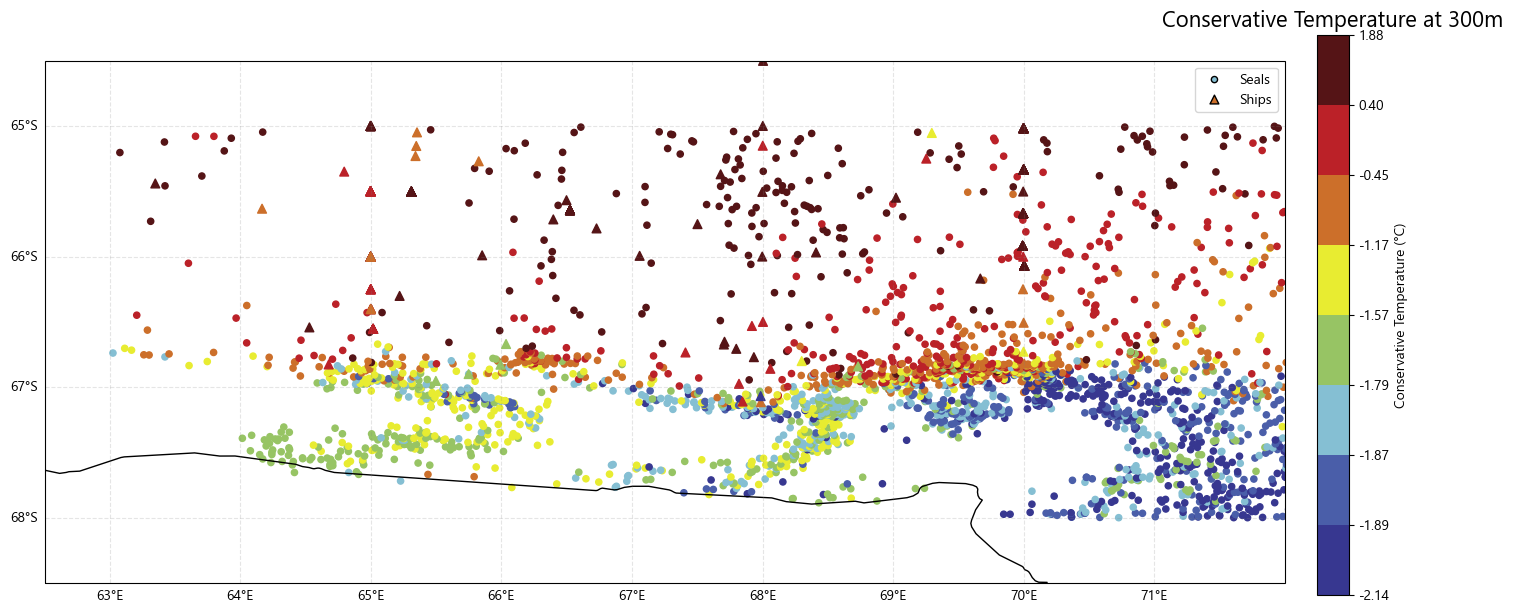

In [271]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from matplotlib import cm
import rasterio.plot
import numpy as np
from matplotlib.colors import LinearSegmentedColormap
import xarray as xr
import cartopy.feature as cfeature
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, zoomed_inset_axes
import cmocean


cmap_temp = plt.cm.get_cmap('cmo.thermal')


# Create a figure and an axes object using cartopy projection
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(16, 14))





#### custom colour map
vmin, vmax = -4000, 0
cmap_colors = [(0, 0.5, 0.8), (1, 1, 1)]
cmap_name = 'custom_blue'
cmap = LinearSegmentedColormap.from_list(cmap_name, cmap_colors)
cmap.set_over('gray')

# Open the NetCDF file with xarray
gebco = xr.open_dataset('bathymetry data/netCDF_CD_bathymetry/GEBCO_30_Apr_2023_950e3c1fe0d8/gebco_2022_n-63.0_s-68.5_w62.5_e72.0.nc', engine='netcdf4')

# # Use the custom colormap with light gray color for values >= 0
# elevation = gebco.elevation.where(gebco.elevation < 0, np.nan)
# im = elevation.plot.pcolormesh('lon', 'lat', ax=ax, cmap=cmap, vmin=-4000, vmax=0, add_colorbar=False)

# Add colorbar
# cbar = plt.colorbar(im, ax=ax, orientation='horizontal', shrink=0.5, pad=0.1, extend='min')
# cbar.set_label('Depth (m)', fontsize=11)

# ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)








# Create a plot of the bathymetry data using Cartopy
# ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
#ax.set_extent([gebco.lon.min(), gebco.lon.max(), gebco.lat.min(), gebco.lat.max()])
ax.set_extent([gebco.lon.min(), gebco.lon.max(), -68.5, -64.5])
Coast = cfeature.NaturalEarthFeature(category='phyiscal',scale='50m',facecolor='none',name='coastline')

# Use the custom colormap with light gray color for values >= 0
elevation = gebco.elevation.where(gebco.elevation < 0, np.nan)
#im = elevation.plot.pcolormesh('lon', 'lat', ax=ax, cmap=cmap, vmin=-3500, vmax=0, add_colorbar=False)
#im = elevation.plot.contourf(x='lon',y='lat', ax=ax, cmap='cmo.deep_r',levels=np.array([*np.arange(-3500,250,250)]),add_colorbar=False)


#add on gridlines
#ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
gl = ax.gridlines(draw_labels=True, color='gray', alpha=0.2, linestyle='--', xlocs=np.arange(63, 73, 1), ylocs=np.arange(-69, -63, 1))
gl.right_labels = False
gl.top_labels = False



# Filter the data for seals and ships separately
seals_data = filtered_type == 1
ships_data = filtered_type == 2

seals_latitude = filtered_latitude[seals_data]
seals_longitude = filtered_longitude[seals_data]
seals_cons_temperature = filtered_cons_temperature[seals_data]

ships_latitude = filtered_latitude[ships_data]
ships_longitude = filtered_longitude[ships_data]
ships_cons_temperature = filtered_cons_temperature[ships_data]


# Plot the scatter plot with temperature-based coloring and different marker shapes for seals and ships
seals_scatter = ax.scatter(seals_longitude, seals_latitude, transform=ccrs.PlateCarree(),
                           s=20, c=seals_cons_temperature, cmap=cmap_deep, marker='o', label='Seals', norm=norm)

ships_scatter = ax.scatter(ships_longitude, ships_latitude, transform=ccrs.PlateCarree(),
                           s=40, c=ships_cons_temperature, cmap=cmap_deep, marker='^', label='Ships', norm=norm)


# ## Plot the scatter plot with temperature-based coloring
# #use this line to plot all data together
# scatter = ax.scatter(filtered_longitude, filtered_latitude, transform=ccrs.PlateCarree(), s=10, c=filtered_cons_temperature, cmap=cmap, vmax = -0.5)
# # use this line to plot by season
# # scatter = ax.scatter(season_filtered_longitude_in_range, season_filtered_latitude_in_range, transform=ccrs.PlateCarree(), s=20, c=season_cons_temperature_in_range, cmap=cmap, vmax = -0.5)


#Add colorbar
# cbar = plt.colorbar(seals_scatter, ax=ax, orientation='vertical', shrink=0.3, pad=0.03, aspect=10, extend='both')
# cbar.set_label('Conservative Temperature (°C)', fontsize=11)


from matplotlib.ticker import FuncFormatter

def format_ticks(x, pos):
    return f'{x:.2f}'

formatter = FuncFormatter(format_ticks)

# Create a color bar axes
cax = plt.axes([0.92, 0.3, 0.02, 0.4])  # [x, y, width, height]
# Create the color bar using the ScalarMappable
plt.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap_deep), cax=cax, orientation='vertical', label='Conservative Temperature (°C)', format=formatter)



# Create a legend
legend = ax.legend()

# Set the color of legend handles to black
for handle in legend.legend_handles:
    handle.set_color('black')


##### plotting the CTD data on map #####

# # Add the cast name as text to the plot
# for i, txt in enumerate(data['Names']):
#     ax.text(data['Lon'][i], data['Lat'][i]-0.1, txt, transform=ccrs.PlateCarree(), fontsize=7)

# Add a dynamic title
plt.title(f'Conservative Temperature at {depth_range}m', fontsize=16)

plt.show()

C:\Users\sienn\AppData\Local\Temp\ipykernel_21260\3406898679.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap_temp = plt.cm.get_cmap('cmo.thermal')


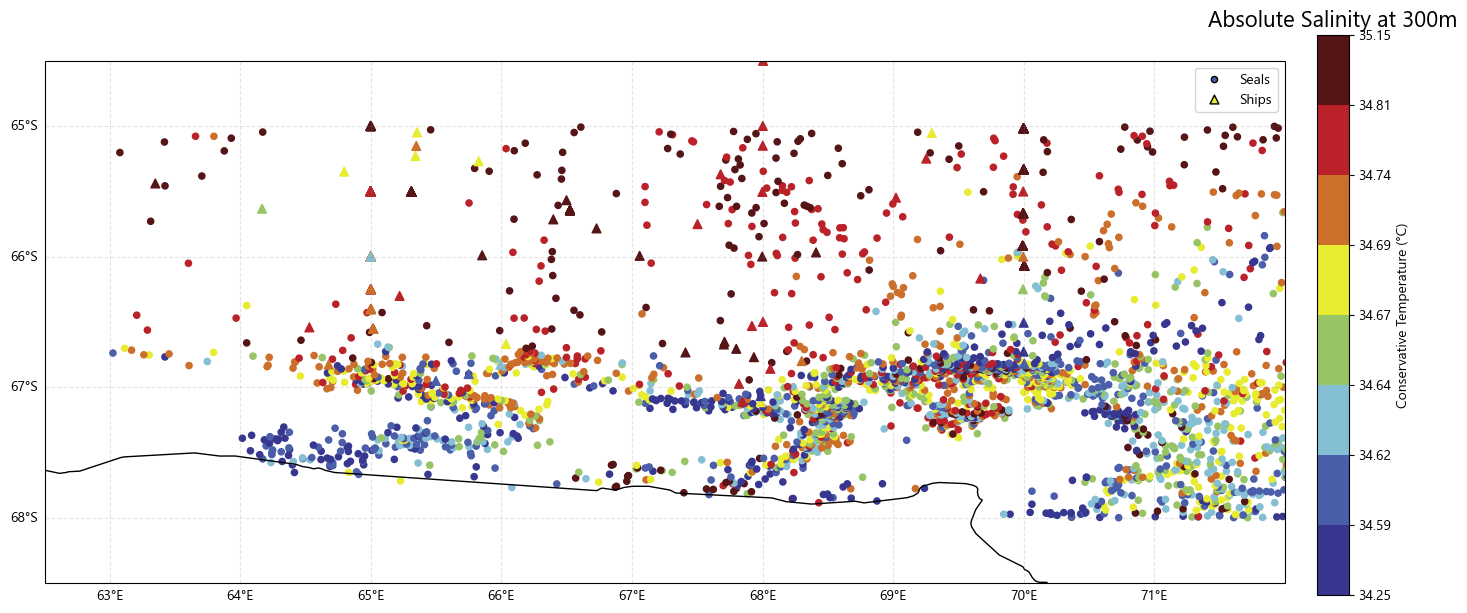

In [274]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from matplotlib import cm
import rasterio.plot
import numpy as np
from matplotlib.colors import LinearSegmentedColormap
import xarray as xr
import cartopy.feature as cfeature
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, zoomed_inset_axes
import cmocean


cmap_temp = plt.cm.get_cmap('cmo.thermal')


# Create a figure and an axes object using cartopy projection
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(16, 14))





#### custom colour map
vmin, vmax = -4000, 0
cmap_colors = [(0, 0.5, 0.8), (1, 1, 1)]
cmap_name = 'custom_blue'
cmap = LinearSegmentedColormap.from_list(cmap_name, cmap_colors)
cmap.set_over('gray')

# Open the NetCDF file with xarray
gebco = xr.open_dataset('bathymetry data/netCDF_CD_bathymetry/GEBCO_30_Apr_2023_950e3c1fe0d8/gebco_2022_n-63.0_s-68.5_w62.5_e72.0.nc', engine='netcdf4')

# # Use the custom colormap with light gray color for values >= 0
# elevation = gebco.elevation.where(gebco.elevation < 0, np.nan)
# im = elevation.plot.pcolormesh('lon', 'lat', ax=ax, cmap=cmap, vmin=-4000, vmax=0, add_colorbar=False)

# Add colorbar
# cbar = plt.colorbar(im, ax=ax, orientation='horizontal', shrink=0.5, pad=0.1, extend='min')
# cbar.set_label('Depth (m)', fontsize=11)

# ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)








# Create a plot of the bathymetry data using Cartopy
# ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
#ax.set_extent([gebco.lon.min(), gebco.lon.max(), gebco.lat.min(), gebco.lat.max()])
ax.set_extent([gebco.lon.min(), gebco.lon.max(), -68.5, -64.5])
Coast = cfeature.NaturalEarthFeature(category='phyiscal',scale='50m',facecolor='none',name='coastline')

# Use the custom colormap with light gray color for values >= 0
elevation = gebco.elevation.where(gebco.elevation < 0, np.nan)
#im = elevation.plot.pcolormesh('lon', 'lat', ax=ax, cmap=cmap, vmin=-3500, vmax=0, add_colorbar=False)
#im = elevation.plot.contourf(x='lon',y='lat', ax=ax, cmap='cmo.deep_r',levels=np.array([*np.arange(-3500,250,250)]),add_colorbar=False)


#add on gridlines
#ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
gl = ax.gridlines(draw_labels=True, color='gray', alpha=0.2, linestyle='--', xlocs=np.arange(63, 73, 1), ylocs=np.arange(-69, -63, 1))
gl.right_labels = False
gl.top_labels = False



# Filter the data for seals and ships separately
seals_data = filtered_type == 1
ships_data = filtered_type == 2

seals_latitude = filtered_latitude[seals_data]
seals_longitude = filtered_longitude[seals_data]
seals_cons_temperature = filtered_cons_temperature[seals_data]

ships_latitude = filtered_latitude[ships_data]
ships_longitude = filtered_longitude[ships_data]
ships_cons_temperature = filtered_cons_temperature[ships_data]


# Plot the scatter plot with temperature-based coloring and different marker shapes for seals and ships
seals_scatter = ax.scatter(seals_longitude, seals_latitude, transform=ccrs.PlateCarree(),
                           s=20, c=seals_abs_salinity, cmap=cmap_deep, marker='o', label='Seals', norm=norm)

ships_scatter = ax.scatter(ships_longitude, ships_latitude, transform=ccrs.PlateCarree(),
                           s=40, c=ships_abs_salinity, cmap=cmap_deep, marker='^', label='Ships', norm=norm)


# ## Plot the scatter plot with temperature-based coloring
# #use this line to plot all data together
# scatter = ax.scatter(filtered_longitude, filtered_latitude, transform=ccrs.PlateCarree(), s=10, c=filtered_cons_temperature, cmap=cmap, vmax = -0.5)
# # use this line to plot by season
# # scatter = ax.scatter(season_filtered_longitude_in_range, season_filtered_latitude_in_range, transform=ccrs.PlateCarree(), s=20, c=season_cons_temperature_in_range, cmap=cmap, vmax = -0.5)


#Add colorbar
# cbar = plt.colorbar(seals_scatter, ax=ax, orientation='vertical', shrink=0.3, pad=0.03, aspect=10, extend='both')
# cbar.set_label('Conservative Temperature (°C)', fontsize=11)


from matplotlib.ticker import FuncFormatter

# Your existing code

def format_ticks(x, pos):
    return f'{x:.2f}'

formatter = FuncFormatter(format_ticks)

# Create a color bar axes
cax = plt.axes([0.92, 0.3, 0.02, 0.4])  # [x, y, width, height]
# Create the color bar using the ScalarMappable
plt.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap_deep), cax=cax, orientation='vertical', label='Conservative Temperature (°C)', format=formatter)


# Create a legend
legend = ax.legend()

# Set the color of legend handles to black
for handle in legend.legend_handles:
    handle.set_color('black')


##### plotting the CTD data on map #####

# # Add the cast name as text to the plot
# for i, txt in enumerate(data['Names']):
#     ax.text(data['Lon'][i], data['Lat'][i]-0.1, txt, transform=ccrs.PlateCarree(), fontsize=7)

# Add a dynamic title
plt.title(f'Absolute Salinity at {depth_range}m', fontsize=16)

plt.show()

In [ ]:
##########this is code for plotting 300m with a certain season

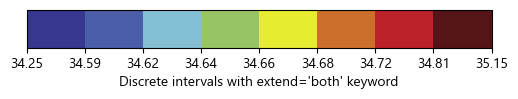

In [329]:
from matplotlib.ticker import FuncFormatter

fig, ax = plt.subplots(figsize=(6, 1))
fig.subplots_adjust(bottom=0.5)

# cmap_deep = plt.cm.get_cmap('cmo.deep')
cmap_deep = mpl.colors.ListedColormap(['#373790', '#4a5ea9', '#85bfd3', '#97c464', '#e8ec31', '#cc6f2a', '#bb2128', '#551416'])

# Calculate percentiles to divide the data into 8 equal parts
#percentiles = np.percentile(thickness['thickness'], np.arange(0, 101, 12.5))  # 0%, 12.5%, 25%, ..., 100%
#percentiles = np.percentile(season_cons_temperature_in_range, np.arange(0, 101, 12.5))  # 0%, 12.5%, 25%, ..., 100%
percentiles = np.percentile(season_abs_salinity_in_range, np.arange(0, 101, 12.5))  # 0%, 12.5%, 25%, ..., 100%

norm = mpl.colors.BoundaryNorm(percentiles, cmap_deep.N)


def format_ticks(x, pos):
    return f'{x:.2f}'

formatter = FuncFormatter(format_ticks)

fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap_deep),
             cax=ax, orientation='horizontal',
             label="Discrete intervals with extend='both' keyword", format=formatter)

C:\Users\sienn\AppData\Local\Temp\ipykernel_21260\1318710845.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap_temp = plt.cm.get_cmap('cmo.thermal')


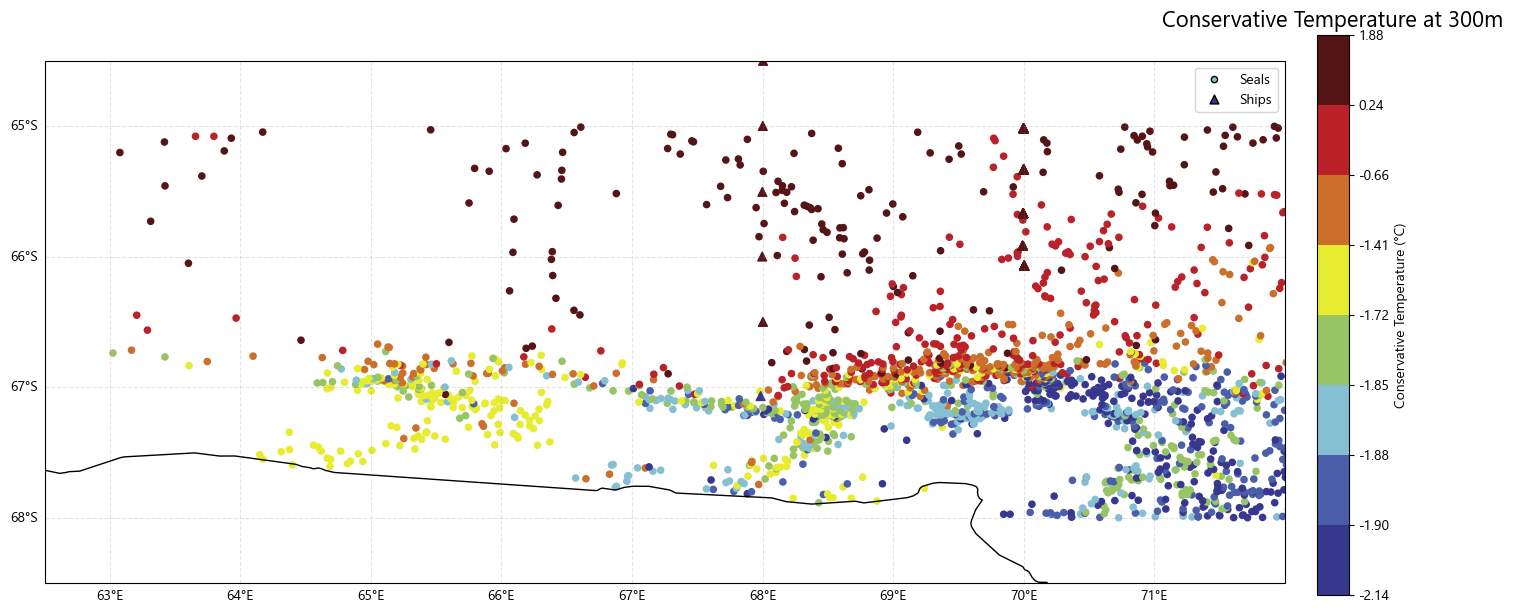

In [327]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from matplotlib import cm
import rasterio.plot
import numpy as np
from matplotlib.colors import LinearSegmentedColormap
import xarray as xr
import cartopy.feature as cfeature
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, zoomed_inset_axes
import cmocean


cmap_temp = plt.cm.get_cmap('cmo.thermal')


# Create a figure and an axes object using cartopy projection
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(16, 14))





#### custom colour map
vmin, vmax = -4000, 0
cmap_colors = [(0, 0.5, 0.8), (1, 1, 1)]
cmap_name = 'custom_blue'
cmap = LinearSegmentedColormap.from_list(cmap_name, cmap_colors)
cmap.set_over('gray')

# Open the NetCDF file with xarray
gebco = xr.open_dataset('bathymetry data/netCDF_CD_bathymetry/GEBCO_30_Apr_2023_950e3c1fe0d8/gebco_2022_n-63.0_s-68.5_w62.5_e72.0.nc', engine='netcdf4')

# # Use the custom colormap with light gray color for values >= 0
# elevation = gebco.elevation.where(gebco.elevation < 0, np.nan)
# im = elevation.plot.pcolormesh('lon', 'lat', ax=ax, cmap=cmap, vmin=-4000, vmax=0, add_colorbar=False)

# Add colorbar
# cbar = plt.colorbar(im, ax=ax, orientation='horizontal', shrink=0.5, pad=0.1, extend='min')
# cbar.set_label('Depth (m)', fontsize=11)

# ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)








# Create a plot of the bathymetry data using Cartopy
# ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
#ax.set_extent([gebco.lon.min(), gebco.lon.max(), gebco.lat.min(), gebco.lat.max()])
ax.set_extent([gebco.lon.min(), gebco.lon.max(), -68.5, -64.5])
Coast = cfeature.NaturalEarthFeature(category='phyiscal',scale='50m',facecolor='none',name='coastline')

# Use the custom colormap with light gray color for values >= 0
elevation = gebco.elevation.where(gebco.elevation < 0, np.nan)
#im = elevation.plot.pcolormesh('lon', 'lat', ax=ax, cmap=cmap, vmin=-3500, vmax=0, add_colorbar=False)
#im = elevation.plot.contourf(x='lon',y='lat', ax=ax, cmap='cmo.deep_r',levels=np.array([*np.arange(-3500,250,250)]),add_colorbar=False)


#add on gridlines
#ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
gl = ax.gridlines(draw_labels=True, color='gray', alpha=0.2, linestyle='--', xlocs=np.arange(63, 73, 1), ylocs=np.arange(-69, -63, 1))
gl.right_labels = False
gl.top_labels = False



# Filter the data for seals and ships separately
seals_data = season_filtered_type_in_range == 1
ships_data = season_filtered_type_in_range == 2

seals_latitude = season_filtered_latitude_in_range[seals_data]
seals_longitude = season_filtered_longitude_in_range[seals_data]
seals_cons_temperature = season_cons_temperature_in_range[seals_data]

ships_latitude = season_filtered_latitude_in_range[ships_data]
ships_longitude = season_filtered_longitude_in_range[ships_data]
ships_cons_temperature = season_cons_temperature_in_range[ships_data]


# Plot the scatter plot with temperature-based coloring and different marker shapes for seals and ships
seals_scatter = ax.scatter(seals_longitude, seals_latitude, transform=ccrs.PlateCarree(),
                           s=20, c=seals_cons_temperature, cmap=cmap_deep, marker='o', label='Seals', norm=norm)

ships_scatter = ax.scatter(ships_longitude, ships_latitude, transform=ccrs.PlateCarree(),
                           s=40, c=ships_cons_temperature, cmap=cmap_deep, marker='^', label='Ships', norm=norm)


# ## Plot the scatter plot with temperature-based coloring
# #use this line to plot all data together
# scatter = ax.scatter(filtered_longitude, filtered_latitude, transform=ccrs.PlateCarree(), s=10, c=filtered_cons_temperature, cmap=cmap, vmax = -0.5)
# # use this line to plot by season
# # scatter = ax.scatter(season_filtered_longitude_in_range, season_filtered_latitude_in_range, transform=ccrs.PlateCarree(), s=20, c=season_cons_temperature_in_range, cmap=cmap, vmax = -0.5)


#Add colorbar
# cbar = plt.colorbar(seals_scatter, ax=ax, orientation='vertical', shrink=0.3, pad=0.03, aspect=10, extend='both')
# cbar.set_label('Conservative Temperature (°C)', fontsize=11)


from matplotlib.ticker import FuncFormatter

def format_ticks(x, pos):
    return f'{x:.2f}'

formatter = FuncFormatter(format_ticks)

# Create a color bar axes
cax = plt.axes([0.92, 0.3, 0.02, 0.4])  # [x, y, width, height]
# Create the color bar using the ScalarMappable
plt.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap_deep), cax=cax, orientation='vertical', label='Conservative Temperature (°C)', format=formatter)



# Create a legend
legend = ax.legend()

# Set the color of legend handles to black
for handle in legend.legend_handles:
    handle.set_color('black')


##### plotting the CTD data on map #####

# # Add the cast name as text to the plot
# for i, txt in enumerate(data['Names']):
#     ax.text(data['Lon'][i], data['Lat'][i]-0.1, txt, transform=ccrs.PlateCarree(), fontsize=7)

# Add a dynamic title
plt.title(f'Conservative Temperature at {depth_range}m', fontsize=16)

plt.show()

C:\Users\sienn\AppData\Local\Temp\ipykernel_21260\1138072870.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap_temp = plt.cm.get_cmap('cmo.thermal')


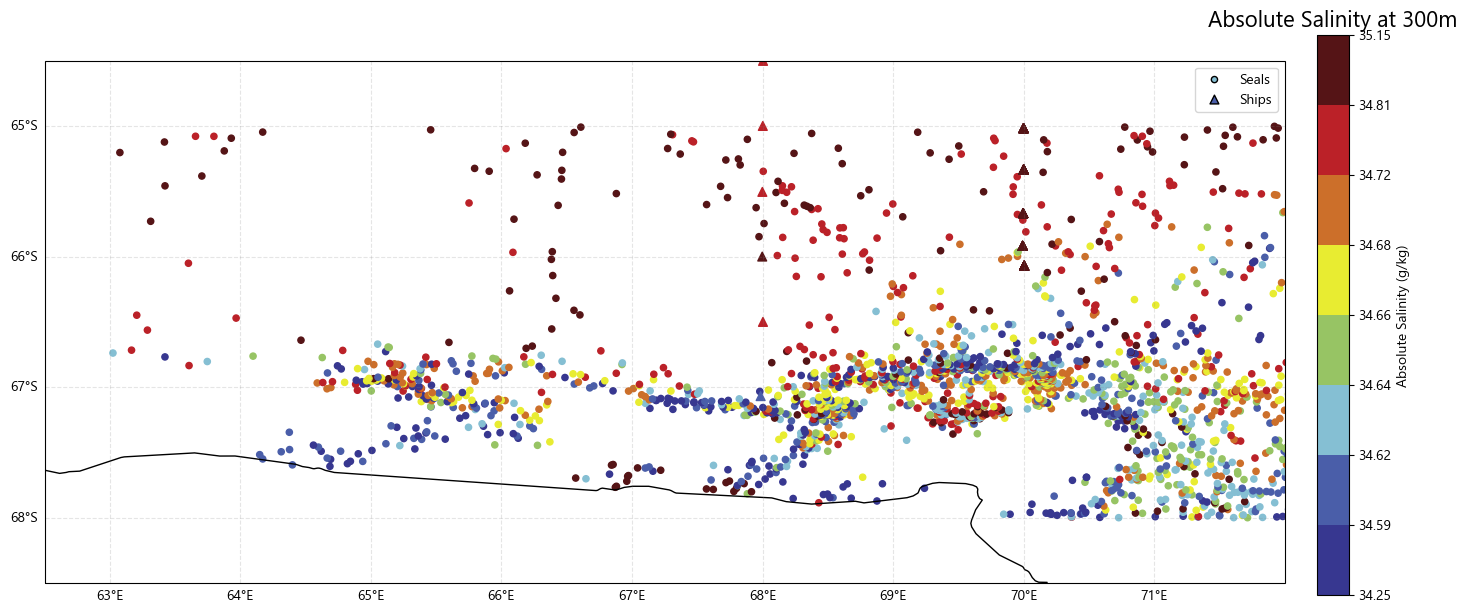

In [331]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from matplotlib import cm
import rasterio.plot
import numpy as np
from matplotlib.colors import LinearSegmentedColormap
import xarray as xr
import cartopy.feature as cfeature
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, zoomed_inset_axes
import cmocean


cmap_temp = plt.cm.get_cmap('cmo.thermal')


# Create a figure and an axes object using cartopy projection
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(16, 14))





#### custom colour map
vmin, vmax = -4000, 0
cmap_colors = [(0, 0.5, 0.8), (1, 1, 1)]
cmap_name = 'custom_blue'
cmap = LinearSegmentedColormap.from_list(cmap_name, cmap_colors)
cmap.set_over('gray')

# Open the NetCDF file with xarray
gebco = xr.open_dataset('bathymetry data/netCDF_CD_bathymetry/GEBCO_30_Apr_2023_950e3c1fe0d8/gebco_2022_n-63.0_s-68.5_w62.5_e72.0.nc', engine='netcdf4')

# # Use the custom colormap with light gray color for values >= 0
# elevation = gebco.elevation.where(gebco.elevation < 0, np.nan)
# im = elevation.plot.pcolormesh('lon', 'lat', ax=ax, cmap=cmap, vmin=-4000, vmax=0, add_colorbar=False)

# Add colorbar
# cbar = plt.colorbar(im, ax=ax, orientation='horizontal', shrink=0.5, pad=0.1, extend='min')
# cbar.set_label('Depth (m)', fontsize=11)

# ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)








# Create a plot of the bathymetry data using Cartopy
# ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
#ax.set_extent([gebco.lon.min(), gebco.lon.max(), gebco.lat.min(), gebco.lat.max()])
ax.set_extent([gebco.lon.min(), gebco.lon.max(), -68.5, -64.5])
Coast = cfeature.NaturalEarthFeature(category='phyiscal',scale='50m',facecolor='none',name='coastline')

# Use the custom colormap with light gray color for values >= 0
elevation = gebco.elevation.where(gebco.elevation < 0, np.nan)
#im = elevation.plot.pcolormesh('lon', 'lat', ax=ax, cmap=cmap, vmin=-3500, vmax=0, add_colorbar=False)
#im = elevation.plot.contourf(x='lon',y='lat', ax=ax, cmap='cmo.deep_r',levels=np.array([*np.arange(-3500,250,250)]),add_colorbar=False)


#add on gridlines
#ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
gl = ax.gridlines(draw_labels=True, color='gray', alpha=0.2, linestyle='--', xlocs=np.arange(63, 73, 1), ylocs=np.arange(-69, -63, 1))
gl.right_labels = False
gl.top_labels = False



# Filter the data for seals and ships separately
seals_data = season_filtered_type_in_range == 1
ships_data = season_filtered_type_in_range == 2

seals_latitude = season_filtered_latitude_in_range[seals_data]
seals_longitude = season_filtered_longitude_in_range[seals_data]
seals_abs_salinity = season_abs_salinity_in_range[seals_data]

ships_latitude = season_filtered_latitude_in_range[ships_data]
ships_longitude = season_filtered_longitude_in_range[ships_data]
ships_abs_salinity = season_abs_salinity_in_range[ships_data]


# Plot the scatter plot with temperature-based coloring and different marker shapes for seals and ships
seals_scatter = ax.scatter(seals_longitude, seals_latitude, transform=ccrs.PlateCarree(),
                           s=20, c=seals_abs_salinity, cmap=cmap_deep, marker='o', label='Seals', norm=norm)

ships_scatter = ax.scatter(ships_longitude, ships_latitude, transform=ccrs.PlateCarree(),
                           s=40, c=ships_abs_salinity, cmap=cmap_deep, marker='^', label='Ships', norm=norm)


# ## Plot the scatter plot with temperature-based coloring
# #use this line to plot all data together
# scatter = ax.scatter(filtered_longitude, filtered_latitude, transform=ccrs.PlateCarree(), s=10, c=filtered_cons_temperature, cmap=cmap, vmax = -0.5)
# # use this line to plot by season
# # scatter = ax.scatter(season_filtered_longitude_in_range, season_filtered_latitude_in_range, transform=ccrs.PlateCarree(), s=20, c=season_cons_temperature_in_range, cmap=cmap, vmax = -0.5)


#Add colorbar
# cbar = plt.colorbar(seals_scatter, ax=ax, orientation='vertical', shrink=0.3, pad=0.03, aspect=10, extend='both')
# cbar.set_label('Conservative Temperature (°C)', fontsize=11)


from matplotlib.ticker import FuncFormatter

def format_ticks(x, pos):
    return f'{x:.2f}'

formatter = FuncFormatter(format_ticks)

# Create a color bar axes
cax = plt.axes([0.92, 0.3, 0.02, 0.4])  # [x, y, width, height]
# Create the color bar using the ScalarMappable
plt.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap_deep), cax=cax, orientation='vertical', label='Absolute Salinity (g/kg)', format=formatter)



# Create a legend
legend = ax.legend()

# Set the color of legend handles to black
for handle in legend.legend_handles:
    handle.set_color('black')


##### plotting the CTD data on map #####

# # Add the cast name as text to the plot
# for i, txt in enumerate(data['Names']):
#     ax.text(data['Lon'][i], data['Lat'][i]-0.1, txt, transform=ccrs.PlateCarree(), fontsize=7)

# Add a dynamic title
plt.title(f'Absolute Salinity at {depth_range}m', fontsize=16)

plt.show()

In [ ]:
###thickness graphs

In [196]:
# Filter data based on criteria (neutral_density < 28 and depth < 2000)
# #AASW
# criteria_indices = np.where((neutral_density < 28) & (depth < 700))
# #CDW/mCDW
# criteria_indices = np.where((neutral_density > 28) & (neutral_density < 28.27))
# #DSW, mSW, AABW
# criteria_indices = np.where(neutral_density > 28.27)
# #DSW
# criteria_indices = np.where((neutral_density > 28.27) & (depth < 700) & (latitude < -66.5))
# #mSW, AABW
# criteria_indices = np.where((neutral_density > 28.27) & (depth > 700) & (latitude > -66.5))


# Create a DataFrame with the filtered data
filtered_data = pd.DataFrame({
    'latitude': latitude[criteria_indices],
    'longitude': longitude[criteria_indices],
    'depth': depth[criteria_indices],
    'absolute salinity': abs_salinity[criteria_indices],
    'conservative temperature': cons_temperature[criteria_indices]
})


# Group the data by unique latitude and longitude and calculate thickness
grouped = filtered_data.groupby(['latitude', 'longitude'])
thickness = grouped['depth'].apply(lambda x: np.max(x) - np.min(x)).reset_index(name='thickness')
mean_abs_salinity = grouped['absolute salinity'].mean().reset_index(name='mean_abs_salinity')
mean_cons_temperature = grouped['conservative temperature'].mean().reset_index(name='mean_cons_temperature')

# Filter the data to remove rows with thickness == 0
thickness_filtered = thickness[thickness['thickness'] != 0]

# print(thickness)
# print(thickness_filtered)
print(mean_cons_temperature)


      latitude  longitude  mean_cons_temperature
0    -67.99940  71.714300              -1.907870
1    -67.99900  71.608300              -1.969974
2    -67.99790  72.295800              -1.911381
3    -67.99730  71.829600              -1.912988
4    -67.99580  72.396700              -1.882444
...        ...        ...                    ...
1889 -66.68810  72.047300              -0.232232
1890 -66.67090  72.417400              -1.582109
1891 -66.67050  72.316100              -1.470779
1892 -66.66936  66.036112              -1.876909
1893 -66.62400  72.120800              -0.513531

[1894 rows x 3 columns]


C:\Users\sienn\AppData\Local\Temp\ipykernel_21260\612630657.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap_deep = plt.cm.get_cmap('cmo.deep')


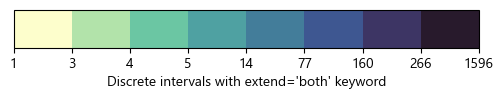

In [242]:
fig, ax = plt.subplots(figsize=(6, 1))
fig.subplots_adjust(bottom=0.5)

cmap_deep = plt.cm.get_cmap('cmo.deep')

# Calculate percentiles to divide the data into 8 equal parts
#percentiles = np.percentile(thickness['thickness'], np.arange(0, 101, 12.5))  # 0%, 12.5%, 25%, ..., 100%
percentiles = np.percentile(thickness_filtered['thickness'], np.arange(0, 101, 12.5))  # 0%, 12.5%, 25%, ..., 100%
# percentiles = [0, 20, 50, 100, 500, 750, 1000, 1250, 1500]

norm = mpl.colors.BoundaryNorm(percentiles, cmap_deep.N)

fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap_deep),
             cax=ax, orientation='horizontal',
             label="Discrete intervals with extend='both' keyword")

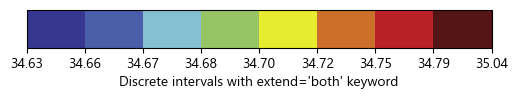

In [197]:
fig, ax = plt.subplots(figsize=(6, 1))
fig.subplots_adjust(bottom=0.5)

# cmap_deep = plt.cm.get_cmap('cmo.deep')
cmap_deep = mpl.colors.ListedColormap(['#373790', '#4a5ea9', '#85bfd3', '#97c464', '#e8ec31', '#cc6f2a', '#bb2128', '#551416'])

# Calculate percentiles to divide the data into 8 equal parts
#data that has zeroes
#percentiles = np.percentile(thickness['thickness'], np.arange(0, 101, 12.5))  # 0%, 12.5%, 25%, ..., 100%
#thickness data with no zeroes
#percentiles = np.percentile(thickness_filtered['thickness'], np.arange(0, 101, 12.5))  # 0%, 12.5%, 25%, ..., 100%
#how to set manual values for colour bar ticks
# percentiles = [0, 20, 50, 100, 500, 750, 1000, 1250, 1500]
# #for mean cons temp
# percentiles = np.percentile(mean_cons_temperature['mean_cons_temperature'], np.arange(0, 101, 12.5))  # 0%, 12.5%, 25%, ..., 100%
#for mean abs salt
percentiles = np.percentile(mean_abs_salinity['mean_abs_salinity'], np.arange(0, 101, 12.5))  # 0%, 12.5%, 25%, ..., 100%

def format_ticks(x, pos):
    return f'{x:.2f}'

formatter = FuncFormatter(format_ticks)

norm = mpl.colors.BoundaryNorm(percentiles, cmap_deep.N)

fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap_deep),
             cax=ax, orientation='horizontal',
             label="Discrete intervals with extend='both' keyword", format=formatter)

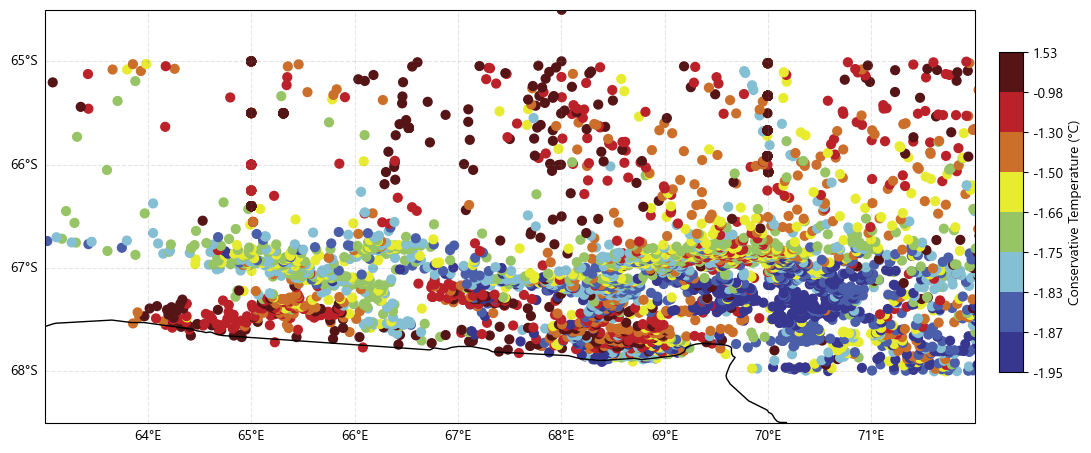

In [312]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# Assuming you already have the data loaded into the respective arrays


# Set up the map
plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.set_extent([63, 72, -68.5, -64.5], crs=ccrs.PlateCarree())
#ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
gl = ax.gridlines(draw_labels=True, color='gray', alpha=0.2, linestyle='--', xlocs=np.arange(63, 73, 1), ylocs=np.arange(-69, -63, 1))
gl.right_labels = False
gl.top_labels = False


# Plot the thickness data on the map
# #thickness
# sc = ax.scatter(thickness['longitude'], thickness['latitude'], c=thickness['thickness'], cmap=cmap_deep, s=40, marker='o', transform=ccrs.PlateCarree(), norm=norm)
#mean cons temp 
sc = ax.scatter(mean_cons_temperature['longitude'], mean_cons_temperature['latitude'], c=mean_cons_temperature['mean_cons_temperature'], cmap=cmap_deep, s=40, marker='o', transform=ccrs.PlateCarree(), norm=norm)
#mean abs salt 
# sc = ax.scatter(mean_abs_salinity['longitude'], mean_abs_salinity['latitude'], c=mean_abs_salinity['mean_abs_salinity'], cmap=cmap_deep, s=40, marker='o', transform=ccrs.PlateCarree(), norm=norm)


#old original colourbar code
#plt.colorbar(sc, orientation='vertical', shrink=0.3, pad=0.03, aspect=10, extend='both', label='Thickness (m)')




from matplotlib.ticker import FuncFormatter

# Your existing code

def format_ticks(x, pos):
    return f'{x:.2f}'

formatter = FuncFormatter(format_ticks)


# Create a color bar axes
cax = plt.axes([0.92, 0.3, 0.02, 0.4])  # [x, y, width, height]
# Create the color bar using the ScalarMappable
#thickness
#plt.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap_deep), cax=cax, orientation='vertical', label='Thickness (m)', format=formatter)
#mean cons temp 
plt.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap_deep), cax=cax, orientation='vertical', label='Conservative Temperature (°C)', format=formatter)
#mean abs salt 
# plt.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap_deep), cax=cax, orientation='vertical', label='Absolute Salinity (g/kg)', format=formatter)


# cbar = plt.colorbar(sc, orientation='vertical', shrink=0.3, pad=0.03, aspect=10, extend='both')
# cbar.set_label(f'Thickness (m)', fontsize=11)

# plt.title('Thickness of Criteria: Neutral Density < 28 kg/m$^3$, Depth < 700m')
#plt.title('Thickness of Criteria: Neutral Density 28 < y$^n$ < 28.27 kg/m$^3$')
plt.show()


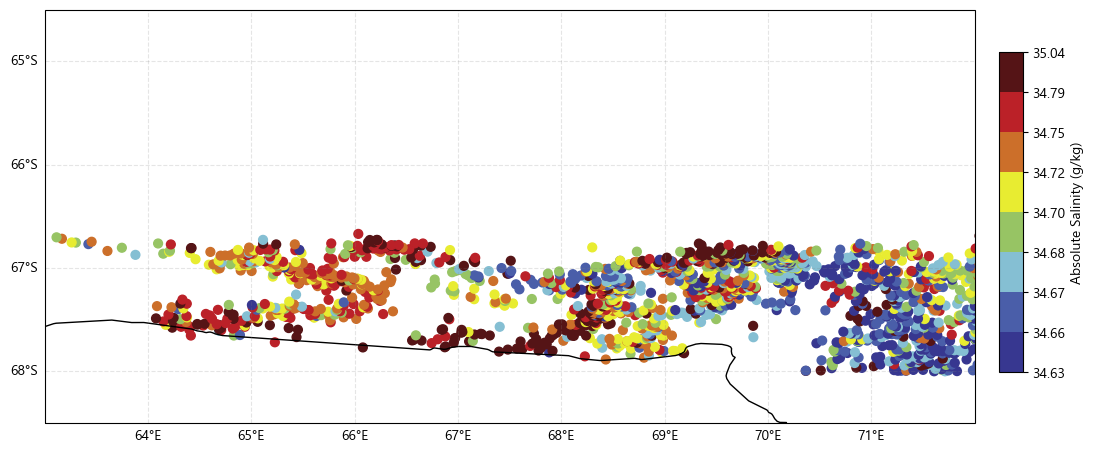

In [198]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# Assuming you already have the data loaded into the respective arrays


# Set up the map
plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.set_extent([63, 72, -68.5, -64.5], crs=ccrs.PlateCarree())
#ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
gl = ax.gridlines(draw_labels=True, color='gray', alpha=0.2, linestyle='--', xlocs=np.arange(63, 73, 1), ylocs=np.arange(-69, -63, 1))
gl.right_labels = False
gl.top_labels = False


# Plot the thickness data on the map
# #thickness
# sc = ax.scatter(thickness['longitude'], thickness['latitude'], c=thickness['thickness'], cmap=cmap_deep, s=40, marker='o', transform=ccrs.PlateCarree(), norm=norm)
# #mean cons temp 
# sc = ax.scatter(mean_cons_temperature['longitude'], mean_cons_temperature['latitude'], c=mean_cons_temperature['mean_cons_temperature'], cmap=cmap_deep, s=40, marker='o', transform=ccrs.PlateCarree(), norm=norm)
#mean abs salt 
sc = ax.scatter(mean_abs_salinity['longitude'], mean_abs_salinity['latitude'], c=mean_abs_salinity['mean_abs_salinity'], cmap=cmap_deep, s=40, marker='o', transform=ccrs.PlateCarree(), norm=norm)


#old original colourbar code
#plt.colorbar(sc, orientation='vertical', shrink=0.3, pad=0.03, aspect=10, extend='both', label='Thickness (m)')




from matplotlib.ticker import FuncFormatter

# Your existing code

def format_ticks(x, pos):
    return f'{x:.2f}'

formatter = FuncFormatter(format_ticks)


# Create a color bar axes
cax = plt.axes([0.92, 0.3, 0.02, 0.4])  # [x, y, width, height]
# Create the color bar using the ScalarMappable
#thickness
#plt.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap_deep), cax=cax, orientation='vertical', label='Thickness (m)', format=formatter)
# #mean cons temp 
# plt.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap_deep), cax=cax, orientation='vertical', label='Conservative Temperature (°C)', format=formatter)
#mean abs salt 
plt.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap_deep), cax=cax, orientation='vertical', label='Absolute Salinity (g/kg)', format=formatter)


# cbar = plt.colorbar(sc, orientation='vertical', shrink=0.3, pad=0.03, aspect=10, extend='both')
# cbar.set_label(f'Thickness (m)', fontsize=11)

# plt.title('Thickness of Criteria: Neutral Density < 28 kg/m$^3$, Depth < 700m')
#plt.title('Thickness of Criteria: Neutral Density 28 < y$^n$ < 28.27 kg/m$^3$')
plt.show()


In [1]:
# create 2 grids, one for the sum total, and one that has the count of points within grid. Then divide grids by eachother to find the mean 

import numpy as np
import pandas as pd


# Assuming you already have a NumPy array called mean_abs_salinity with the data
# Create a DataFrame from the NumPy array
data = pd.DataFrame(mean_abs_salinity, columns=['latitude', 'longitude', 'mean_abs_salinity'])


# Define the grid resolution (0.1 degrees in this case) and the range of latitudes and longitudes you want to cover:
lat_resolution = 0.2
lon_resolution = 0.2

min_lat = -69
max_lat = -63
min_lon = 63
max_lon = 73


# Create empty grids for latitude, longitude, and salinity totals
latitudes = np.arange(min_lat, max_lat + lat_resolution, lat_resolution)
longitudes = np.arange(min_lon, max_lon + lon_resolution, lon_resolution)
total_salinity_grid = np.zeros((len(latitudes), len(longitudes)))
count_grid = np.zeros((len(latitudes), len(longitudes)))


# Iterate through each data point and accumulate the salinity values into the corresponding grid cell
for index, row in data.iterrows():
    lat = row['latitude']
    lon = row['longitude']
    salinity = row['mean_abs_salinity']

    lat_index = int((lat - min_lat) / lat_resolution)
    lon_index = int((lon - min_lon) / lon_resolution)

    total_salinity_grid[lat_index, lon_index] += salinity
    count_grid[lat_index, lon_index] += 1


# Replace zero values in total_salinity_grid with NaN where count is zero
total_salinity_grid[count_grid == 0] = np.nan
# or this line if you want it to do less than x no. of point (e.g. if less than 3 data points, make nan)
# total_salinity_grid[(count_grid == 0) | (count_grid <= 2)] = np.nan


# access the salinity value for a specific grid cell by indexing the salinity_grid
# For example, to get the total salinity at latitude 42.5 and longitude -120.3:
lat_index = int((-67 - min_lat) / lat_resolution)
lon_index = int((65.3 - min_lon) / lon_resolution)

total_salinity = total_salinity_grid[lat_index, lon_index]
count_grid_value = count_grid[lat_index, lon_index]

print(total_salinity)
print(count_grid_value)




# Divide total_salinity_grid by count_grid to calculate the mean
mean_salinity_grid = np.divide(total_salinity_grid, count_grid)

# Access the mean salinity value for a specific grid cell by indexing the mean_salinity_grid
# For example, to get the mean salinity at latitude -67 and longitude 65.3:
mean_salinity = mean_salinity_grid[lat_index, lon_index]

print(mean_salinity)


NameError: name 'mean_abs_salinity' is not defined

: 

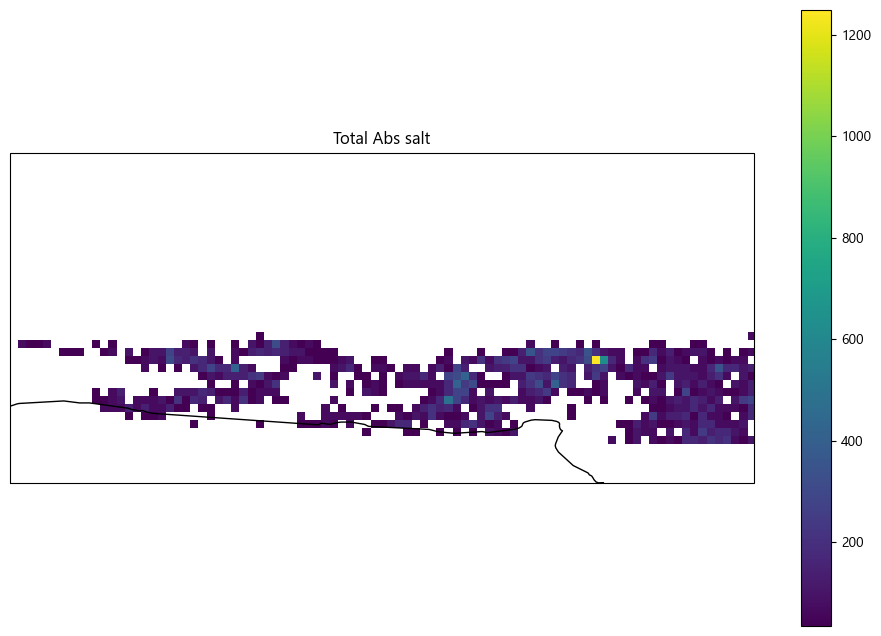

In [201]:
#this just plots the total salinity values to make sure it is doing it right. 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from matplotlib.ticker import FuncFormatter

# Assuming you already have the data loaded into the respective arrays

# Set up the map
plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.set_extent([63, 72, -68.5, -64.5], crs=ccrs.PlateCarree())



# Assuming you have already created the salinity_grid

# Create a meshgrid of latitudes and longitudes
lon, lat = np.meshgrid(longitudes, latitudes)

# Plot the salinity grid
plt.imshow(total_salinity_grid, extent=[min_lon, max_lon, min_lat, max_lat], cmap='viridis', origin='lower')

plt.colorbar()
plt.title('Total Abs salt')

# Show the plot
plt.show()


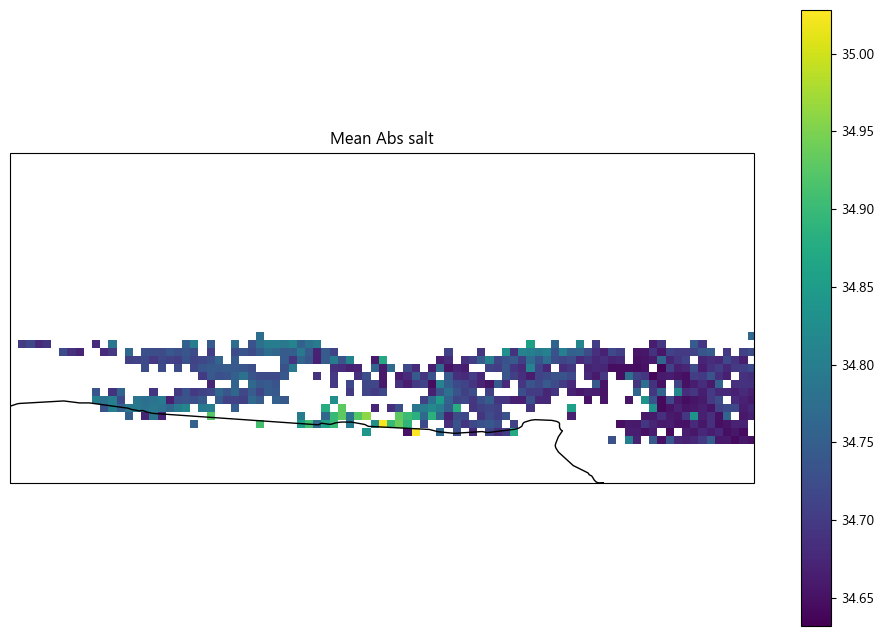

In [202]:
#this just plots the total salinity values to make sure it is doing it right. 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from matplotlib.ticker import FuncFormatter

# Assuming you already have the data loaded into the respective arrays

# Set up the map
plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.set_extent([63, 72, -68.5, -64.5], crs=ccrs.PlateCarree())



# Assuming you have already created the salinity_grid

# Create a meshgrid of latitudes and longitudes
lon, lat = np.meshgrid(longitudes, latitudes)

# Plot the salinity grid
plt.imshow(mean_salinity_grid, extent=[min_lon, max_lon, min_lat, max_lat], cmap='viridis', origin='lower')

plt.colorbar()
plt.title('Mean Abs salt')

# Show the plot
plt.show()


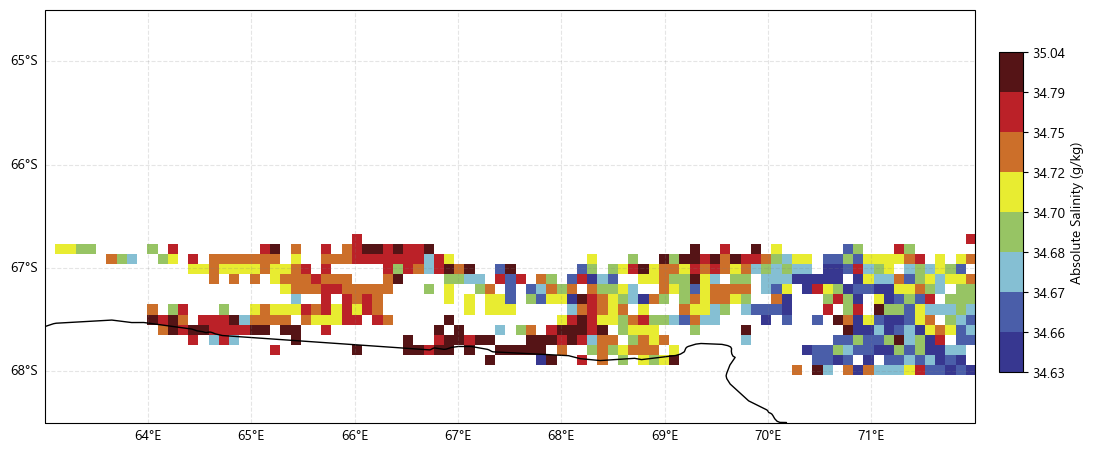

In [210]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# Assuming you already have the data loaded into the respective arrays


# Set up the map
plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.set_extent([63, 72, -68.5, -64.5], crs=ccrs.PlateCarree())
#ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
gl = ax.gridlines(draw_labels=True, color='gray', alpha=0.2, linestyle='--', xlocs=np.arange(63, 73, 1), ylocs=np.arange(-69, -63, 1))
gl.right_labels = False
gl.top_labels = False


# Plot the thickness data on the map
# #thickness
# sc = ax.scatter(thickness['longitude'], thickness['latitude'], c=thickness['thickness'], cmap=cmap_deep, s=40, marker='o', transform=ccrs.PlateCarree(), norm=norm)
# #mean cons temp 
# sc = ax.scatter(mean_cons_temperature['longitude'], mean_cons_temperature['latitude'], c=mean_cons_temperature['mean_cons_temperature'], cmap=cmap_deep, s=40, marker='o', transform=ccrs.PlateCarree(), norm=norm)
#mean abs salt 
#sc = ax.scatter(mean_abs_salinity['longitude'], mean_abs_salinity['latitude'], c=mean_abs_salinity['mean_abs_salinity'], cmap=cmap_deep, s=40, marker='o', transform=ccrs.PlateCarree(), norm=norm)


# Plot the salinity grid
plt.imshow(mean_salinity_grid, extent=[min_lon, max_lon, min_lat, max_lat], cmap=cmap_deep, origin='lower', transform=ccrs.PlateCarree(), norm=norm)

#old original colourbar code
#plt.colorbar(sc, orientation='vertical', shrink=0.3, pad=0.03, aspect=10, extend='both', label='Thickness (m)')




from matplotlib.ticker import FuncFormatter

# Your existing code

def format_ticks(x, pos):
    return f'{x:.2f}'

formatter = FuncFormatter(format_ticks)


# Create a color bar axes
cax = plt.axes([0.92, 0.3, 0.02, 0.4])  # [x, y, width, height]
# Create the color bar using the ScalarMappable
#thickness
#plt.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap_deep), cax=cax, orientation='vertical', label='Thickness (m)', format=formatter)
# #mean cons temp 
# plt.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap_deep), cax=cax, orientation='vertical', label='Conservative Temperature (°C)', format=formatter)
#mean abs salt 
plt.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap_deep), cax=cax, orientation='vertical', label='Absolute Salinity (g/kg)', format=formatter)


# cbar = plt.colorbar(sc, orientation='vertical', shrink=0.3, pad=0.03, aspect=10, extend='both')
# cbar.set_label(f'Thickness (m)', fontsize=11)

# plt.title('Thickness of Criteria: Neutral Density < 28 kg/m$^3$, Depth < 700m')
# plt.title('Thickness of Criteria: Neutral Density 28 < y$^n$ < 28.27 kg/m$^3$')
plt.show()


C:\Users\sienn\AppData\Local\Temp\ipykernel_13504\3387922096.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('cmo.thermal')


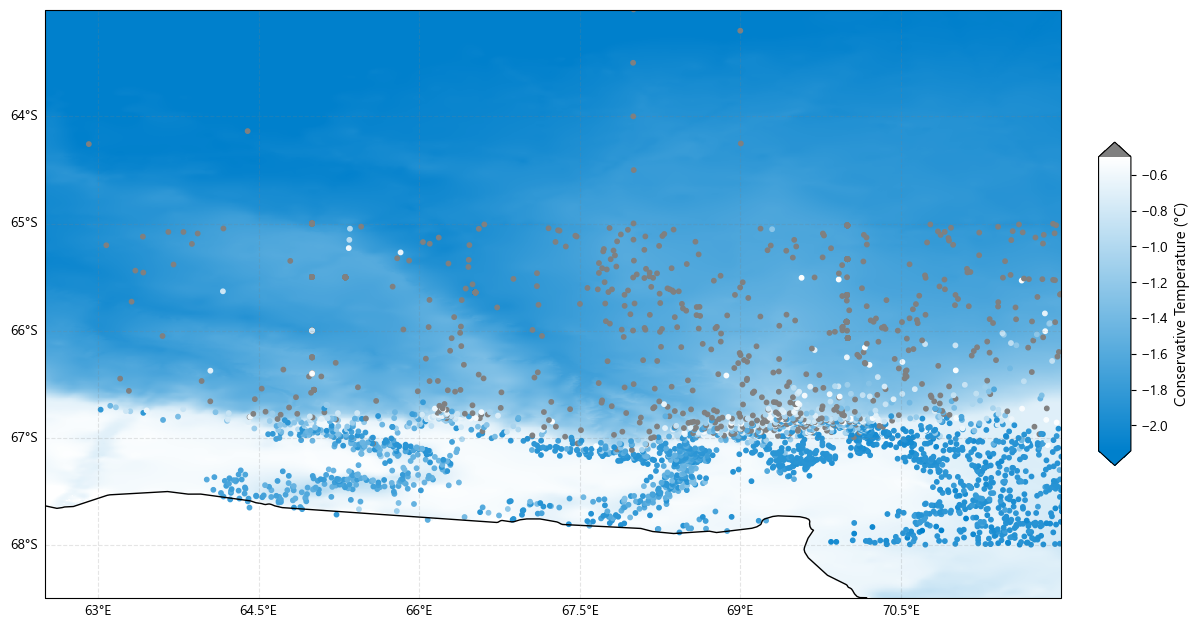

In [206]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from matplotlib import cm
import rasterio.plot
import numpy as np
from matplotlib.colors import LinearSegmentedColormap
import xarray as xr
import cartopy.feature as cfeature
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, zoomed_inset_axes
import cmocean


cmap = plt.cm.get_cmap('cmo.thermal')


# Set the figure size
plt.figure(figsize=(16, 14))

# Create a plot of the bathymetry data using Cartopy
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.set_extent([gebco.lon.min(), gebco.lon.max(), gebco.lat.min(), gebco.lat.max()])
Coast = cfeature.NaturalEarthFeature(category='phyiscal',scale='50m',facecolor='none',name='coastline')

# Use the custom colormap with light gray color for values >= 0
elevation = gebco.elevation.where(gebco.elevation < 0, np.nan)
#im = elevation.plot.pcolormesh('lon', 'lat', ax=ax, cmap=cmap, vmin=-3500, vmax=0, add_colorbar=False)
#im = elevation.plot.contourf(x='lon',y='lat', ax=ax, cmap='cmo.deep_r',levels=np.array([*np.arange(-3500,250,250)]),add_colorbar=False)


#add on gridlines
#ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
gl = ax.gridlines(draw_labels=True, color='gray', alpha=0.2, linestyle='--')
gl.right_labels = False
gl.top_labels = False






#### custom colour map
vmin, vmax = -4000, 0
cmap_colors = [(0, 0.5, 0.8), (1, 1, 1)]
cmap_name = 'custom_blue'
cmap = LinearSegmentedColormap.from_list(cmap_name, cmap_colors)
cmap.set_over('gray')

# Open the NetCDF file with xarray
gebco = xr.open_dataset('bathymetry data/netCDF_CD_bathymetry/GEBCO_30_Apr_2023_950e3c1fe0d8/gebco_2022_n-63.0_s-68.5_w62.5_e72.0.nc', engine='netcdf4')

# Use the custom colormap with light gray color for values >= 0
elevation = gebco.elevation.where(gebco.elevation < 0, np.nan)
im = elevation.plot.pcolormesh('lon', 'lat', ax=ax, cmap=cmap, vmin=-4000, vmax=0, add_colorbar=False)

# Add colorbar
# cbar = plt.colorbar(im, ax=ax, orientation='horizontal', shrink=0.5, pad=0.1, extend='min')
# cbar.set_label('Depth (m)', fontsize=11)

# ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)







## Plot the scatter plot with temperature-based coloring
#use this line to plot all data together
scatter = ax.scatter(filtered_longitude, filtered_latitude, transform=ccrs.PlateCarree(), s=10, c=filtered_cons_temperature, cmap=cmap, vmax = -0.5)
# use this line to plot by season
# scatter = ax.scatter(season_filtered_longitude_in_range, season_filtered_latitude_in_range, transform=ccrs.PlateCarree(), s=20, c=season_cons_temperature_in_range, cmap=cmap, vmax = -0.5)


# # Add colorbar
cbar = plt.colorbar(scatter, ax=ax, orientation='vertical', shrink=0.3, pad=0.03, aspect=10, extend='both')
cbar.set_label('Conservative Temperature (°C)', fontsize=11)


##### plotting the CTD data on map #####

# # Add the cast name as text to the plot
# for i, txt in enumerate(data['Names']):
#     ax.text(data['Lon'][i], data['Lat'][i]-0.1, txt, transform=ccrs.PlateCarree(), fontsize=7)


plt.show()